In [286]:
#wellcome V3 

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from datetime import datetime
import pandas as pd
import time
from selenium.common.exceptions import NoSuchElementException
import re

driver = webdriver.Chrome()

url = "https://www.wellcome.com.hk/zh-hant/category/100001/1.html"
driver.get(url)

time.sleep(5)

#刪whatsapp pop-up,會阻擋禁入頁面
try:
    whatsapp =driver.find_element(By.XPATH,"//div[@class='easychat-chat-dismiss-button-mobile ']")
    whatsapp.click()
except NoSuchElementException:
    pass

posts = driver.find_elements(By.XPATH, "//a[@class='a-link router-link ware-wrapper']")

#貼文既連結<<<唔好刪,刪左直接唔洗寫
hrefs = [post.get_attribute("href") for post in posts]
base_url = "https://www.wellcome.com.hk"
product_urls = []
sold_out_status = []
wine_list = []
names = []
brands = []
pro_tags = []
current_prices = []
original_prices = []
volume= []
item_code = set()
#product_ids = set()


# 品牌名,加油後面慢慢加 
#BERNARD MAGREZ=海之藍 係同一款 佳樂事=CARLO  CH. D'ESCLANS=蝶之蘭酒莊   Chateau 梅鐸紅酒=CHATEAU HOLDEN  FRENCH CELLARS=法國酒窖 
#PAPE CLEMENT=Chateau Fombrauge PARTICULAR=杜卡斯=杜哈米陸  TIERRA D CUBAS=富巴斯                
brand_pattern = re.compile(r'(生力|蠔灣蘇維翁|朝日|布萊特|奔富冠蘭山系列|奔富|好卡頓|青島|史丹尼|藍妹|菲臘羅富齊|瑪特堡蘇維翁|獅威|K1664|詩莊堡|夏廸|\
                           |19 Crimes|19 CRIMES|絕對伏特加|Antinori|艾普羅|Ars Collecta|Artelatino|Auld Family|百加得|百利|百齡壇|加州赤足|八龍閣|必富達|\
                           |Beefsteak Club|Beefsteakclub|BERNARD MAGREZ|海之藍|藍冰|龐貝藍鑽石|寶尚父子|博嵐歌酒莊|BROWN BROTHERS|布萊特|百威|Pauillac|\
                           |金巴利|帝國田園|摩根船長|佳樂事|CARLO|嘉士伯|Carnivor|法國貝爾丹酒莊|奧希耶古堡|蝶之蘭酒莊|Ch. D\'Esclans|CH DE FIEUZA|羅拔世|幻之龍|\
                           |法國娜嘉麗酒莊|法國雲尼臣酒莊|CH.D\'ESCLANS|CH.LASCOMBES|CH.LES VALLEES|來福酒莊|CHANDON|香桐|尚德嘉莊園|Chateau 波爾多|\
                           |梅鐸紅酒|Chateau 優等波爾多紅酒|芝華士|蝶矢|雙劍蘇格蘭威士忌|雲霧之灣|康德努酒莊|Pepperjack|可樂娜|博多歌酒莊|BAREFOOT|\
                           |君度|智利干露紅魔鬼|Coopers|COOPERSS|拿破崙|法國拉菲|智利拉菲|Dewars|添普蘭尼諾|E.Guigal|艾丁格|智利武當|Fernando De Ca|FOUR PILLARS|Four Pillars|\
                           |FRENCH CELLARS|法國酒窖|月桂冠|GEORG JENSEN|雲咸|合同酒精|金星|Goose Island|哥頓|馬爾貝紅酒|GRAINSHAKER|法國小龍船波爾多紅酒|\
                           |格蘭堡|健力士|古越龍山|鬼佬|白鶴|夏迪|Havana|健樂園|喜力|軒尼詩|英雄啤酒|Higherthan|海特他拿|海特|紅星牌|傑卡斯|德國野格|Jean Bouchard|\
                           |濟州漢拏山|占邊|真露|尊美醇|尊尼獲加|樂怡仙地|豪帥|金利來|Jack Daniel\'s|K BRANDS|K VINTNERS|K Vintners|菊正宗|羅拔二世|金威|麒麟|國士無雙|越乃寒梅|\
                           |久保田|嘉芙麗酒莊|La Gioiosa|LA MARCA|La Marca|里奧哈|李錦記|Leffe|巴頓酒莊|酒花精靈|LITTLE GIANT|瀘州老窖|M.Cellars|M.CELLARS|M.GOLD|M.Gold|\
                           |幻之瀧|馬利保|馬爹利|馬天爾|瑪天露|Medoc|MG|Mg Spirit|Modelo|酩悅|森永|MOUNT PEAK|Mount Peak|瑪特堡|舞鶴|瑪姆|麥菲士|無名氏|日本盛|蠔灣|Orion|ORION|塔牌|\
                           |Pape Clement|Chateau Fombrauge|Particular|杜卡斯|杜哈米陸酒莊|倍事佳|拉菲酒莊 |Paul Blanck|保羅蘭|PEPPERJACK|PERONI|Peroni|巴黎之花|葡萄之路黃標系列|\
                           |保吉士拿|R By Clinet|羅遜氏|人頭馬|美國加州蒙大菲|Roche Bellene|意大利羅芬諾|雜賀|寶嘉龍酒副牌|三生牌|森美亞頓|愛士圖爾莊園|斯托堡|\
                           |薩摩|施務露|白雪|順昌源|泰國勝獅|皇冠|雪花|Somersby|SOMERSBY|Squealing Pig|SQUEALING PIG|聖哈利|史丹尼|Stella Artois|STERLING|Sticks|紅牌|STONE&WOOD|Stone&Wood|\
                           |三得利|太平山|台灣啤酒|寶酒造|添加利|Taylor\'s|智利美麗地|格蘭利威|倉吉蒸餾所|麥卡倫|蘇格登|THEHONEYMAN|THREE OAKS|TIERRA D CUBAS|富巴斯|\
                           |Trivento|梅乃宿|Vessier Brut|凱歌|波瑪酒莊|VODKA SODA &|WARNER\'S|Warner\'s|WHISTLER|Whistler|白馬|威廉費爾莊園|禾富巴斯|拉菲爾古堡莊園|\
                           |醞思酒莊|咸亨|洋河|燕京|雅拉堡|黃尾袋鼠|Yomeishu|少爺|越州|利達民|千代壽|御湖鶴|獺祭|茅台|JACK DANIEL\'S|雄獅酒莊副牌|杏花村)') 

#分類紅白啤清啤,如果沒有我先SETUP(NULL),後面會回來SETUP
red_wine_pattern = re.compile(r'紅酒|奔富|瑪特堡單一園系列431宣言灰皮諾|波爾多紅|Rhone Rouge|赤霞珠|切粒子|黑皮諾|優等波爾多|Dolce Rosso|紅葡萄酒|Manadero|\
                              |Dux Imperial|富巴斯皇家特級|Malbec|CH DE FIEUZAL|庫納瓦梅洛|431宣言灰皮諾|Chateau Haut|Cabernet Merlot|CHEVALIER|\
                              |紅莫斯卡托|Tempranillo|Bourgogne|Raymond Cyrot|Bordeaux|GOLDEN WEST|Wilberforce|Shiraz|Syrah|寶嘉龍酒|雄獅酒莊|\
                              |Haut-Peyraguey|杜卡斯酒莊|巴頓酒莊副牌|Pinot|愛士圖爾莊園副牌|Pichon Baro|原箱CARLO ROSSICALIFORNIA DARK|嘉芙麗酒莊副牌|\
                              |拉菲酒莊 2011|杜哈米陸酒莊 2020|混釀|仙粉黛|梅洛|Cab Sauv|California Dark', re.IGNORECASE)

beer_pattern = re.compile(r'啤酒|嘉士伯|CRUSHED APPLE CIDER|樂怡仙地|黑啤|麥啤|一番搾|生啤|鬼佬|Coopers|少爺|Pacific Ale|GREEN COAST|CHU-HI', re.IGNORECASE)

white_wine_pattern = re.compile(r'白酒|白葡萄酒|波爾多白|莎當尼|沙當妮|莎當妮|雷司令|長相思|Blanco|灰皮諾|BROWN BROTHERS|Chardonnay|Cervaro|Chabolle Musigny|\
                                |Gewurztraminer|Meursault|西班牙果酒', re.IGNORECASE)

clear_beer_pattern = re.compile(r'清啤', re.IGNORECASE)

champagne_pattern = re.compile(r'香檳|Cuvee Decouverte|SPRITZ|CHANDON|原箱佳樂事莫斯卡托|MARCAPROSECCO',re.IGNORECASE)

sparkling_wine_pattern = re.compile(r'汽酒|汽泡酒|有汽甜酒|氣泡酒|有汽葡萄酒|Grand Rose|普羅賽柯',re.IGNORECASE)

liquor_pattern = re.compile(r'威士忌|Whisky|干邑|Cognac|雞尾酒|氈酒|毡酒|Gin|拔蘭地|白蘭地|龍舌蘭|冧酒|蘭姆酒|Rum|忌廉甜酒|力嬌酒|VODKA|伏特加|尊尼獲加|優質香檳區干邑|VSOP|\
                            |甜威末酒|香甜酒|秀訂金福|Dry Gin|十二年黃金三桶',re.IGNORECASE) #烈酒

jap_alco_pattern = re.compile(r'養命酒|甘酒|清酒|上撰|菊正宗|梅原酒|梅酒|燒酎|純米大吟釀|梅子酒|大吟釀|柚子酒|生貯造酒|柚子純米酒|純米梅酒|山田錦|柚子濁酒|辛口|生酛|吟釀灑',re.IGNORECASE)

tonic_wine_pattern = re.compile(r'人參酒|骨痛酒|補酒|金雞鐵樹酒')

chin_alco_pattern = re.compile(r'花彫酒|花雕酒|花彫|紹興酒|紹興|瀘州老窖|花雕|糯米酒|加飯酒|茅台|甜酒釀|玫瑰露酒|黑標10年|二鍋頭酒|藍瓷|高糧酒|汾酒',re.IGNORECASE)

kor_alco_pattern = re.compile(r'濟州漢拏山|真露|燒酒',re.IGNORECASE)

fruit_pattern = re.compile(r'蘋果酒|接骨木花|SOMERSBY',re.IGNORECASE)

rose_pattern = re.compile(r'玫瑰酒|玫瑰紅酒|Garnacha Rosado|玫瑰葡萄酒|玫瑰氣泡酒|Cavarose|Rose Wine|Rose Non Vintage|白仙芬黛酒|Bone Rose',re.IGNORECASE)

honey_wine_pattern = re.compile(r'蜂蜜酒|HONEY WINE',re.IGNORECASE)

fortified_Wine_pattern = re.compile(r'波特酒|缽酒|砵酒|雪利酒|Ruby Port|Oloroso',re.IGNORECASE)

no_alco_pattern = re.compile(r'無酒精',re.IGNORECASE)

peach_pattern = re.compile(r'白桃酒',re.IGNORECASE)


last_page = driver.find_element(By.XPATH,"//a[@class='last cursor num-box']").text
print(last_page)

for i in range(int(last_page)-1): #int(last_page)-1
    time.sleep(2)
    posts = driver.find_elements(By.XPATH, "//a[@class='a-link router-link ware-wrapper']")
    for i in range(len(posts)):
        posts = driver.find_elements(By.XPATH, "//a[@class='a-link router-link ware-wrapper']")
        post = posts[i]
        post.click()
        time.sleep(2)
        find_pcode = driver.find_element(By.CLASS_NAME,"item-code").text
        #print(find_pcode)
        pcode = find_pcode.split(': ')[1]
        #print(pcode)
        item_code.add(pcode)
        #back to main page
        driver.back()
        time.sleep(2)
        driver.execute_script("window.scrollTo(0,50);")

    posts = driver.find_elements(By.XPATH, "//a[@class='a-link router-link ware-wrapper']")
    for post in posts:
        name = post.find_element(By.XPATH, ".//div[@class='name']").text
        names.append(name.strip())
        try:
            pro_tag = post.find_element(By.XPATH, ".//div[@class='pro tag']")
            pro_tag_text = pro_tag.text
        except NoSuchElementException:
            pro_tag_text = 'None'
    
        pro_tags.append(pro_tag_text)
        
        # 匹配品牌個名
        brand_match = brand_pattern.search(name)
        if brand_match:
            brand = brand_match.group()
        else:
            brand = None
        brands.append(brand)

        # 分類紅酒、白酒、啤酒和清啤
        if red_wine_pattern.search(name):
            wine_type = "紅酒"
        elif white_wine_pattern.search(name):
            wine_type = "白酒"
        elif beer_pattern.search(name):
            wine_type = "啤酒"
        elif clear_beer_pattern.search(name):
            wine_type = "清啤"
        elif liquor_pattern.search(name):
            wine_type = '烈酒'
        elif champagne_pattern.search(name):
            wine_type = "香檳"
        elif sparkling_wine_pattern.search(name):
            wine_type = '汽酒'
        elif fruit_pattern.search(name):
            wine_type = '果酒'
        elif jap_alco_pattern.search(name):
            wine_type = '日本酒'
        elif chin_alco_pattern.search(name):
            wine_type = '中國酒'
        elif tonic_wine_pattern.search(name):
            wine_type = '滋補酒'
        elif kor_alco_pattern.search(name):
            wine_type = '韓國酒'
        elif rose_pattern.search(name):
            wine_type = '玫瑰酒'
        elif honey_wine_pattern.search(name):
            wine_type = '蜂蜜酒'
        elif fortified_Wine_pattern.search(name):
            wine_type = '加強葡萄酒'
        elif peach_pattern.search(name):
            wine_type = '白桃酒'
        elif no_alco_pattern.search(name):
            wine_type = '無酒精'
        else:
            wine_type = None
            
        wine_list.append(wine_type)

        match = re.search(r'(\d+)\s*(ML|LT|CL|BT|PK|GM)', name, re.IGNORECASE) 
        if match:
            volume.append(match.group(1) + match.group(2))  
        else:
            volume.append(None)
        
        try:
            product_id_ar = post.get_attribute('href')
            full_url = base_url + product_id_ar.split(base_url)[-1]
            product_urls.append(full_url)
        except NoSuchElementException:
            full_url = None 
        

        
        price_box = post.find_element(By.XPATH, ".//div[@class='price-box']")
        try:
            
            price = price_box.find_element(By.XPATH, ".//span[@class='price']").text.replace('$','').replace('.00','').replace(',','')
        except NoSuchElementException:
            price = ""  

        line_price = price  
        try:
            
            line_price_element = price_box.find_element(By.XPATH, ".//span[@class='line-price']")
            line_price = line_price_element.text.replace('$','').replace('.00','').replace(',','') if line_price_element else price
        except NoSuchElementException:
            pass  

        current_prices.append(price.strip())
        original_prices.append(line_price.strip())

        try:
            post.find_element(By.XPATH, ".//div[contains(@class, 'sold tag')]")
            sold_out = 1  # 1=冇貨
        except NoSuchElementException:
            sold_out = 0  # 0=有貨

        sold_out_status.append(sold_out)
        
    next_page_element = post.find_element(By.XPATH, "//div[@class='text'][contains(text(),'下一頁')]")
    next_page_element.click()
    

#driver.quit()
#assert len(product_ids) == len(product_urls), "Mismatch in lengths of product_ids and product_urls"
# DF<<LEN
paired_data = list(zip(item_code, brands, names, volume, wine_list, current_prices, original_prices, pro_tags, sold_out_status,product_urls))

df_wc = pd.DataFrame(paired_data, columns=["product_id", "brand", "product", "volume", "type", "current_price", "original_price", "discount", "sold_out","url"])
current_datetime = datetime.now()
formatted_date = current_datetime.strftime("%d-%m-%Y")
df_wc['date'] = formatted_date

df_wc.set_index('date', inplace=True)

df_wc.insert(8, "sold_quantity", ['None']*len(df_wc), True)
df_wc.insert(11, "market_id", ['wellcome'] * len(df_wc), True)



df_wc.tail()

df_wc.to_csv('wc_data_{}.csv'.format(formatted_date))

42


IndexError: list index out of range

In [272]:
#PNS

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from datetime import datetime
import time
import pandas as pd
import re

driver = webdriver.Chrome()
#chrome_options = Options()
#chrome_options.add_argument("--headless=new")
#driver = webdriver.Chrome(options=chrome_options)
#url = "https://www.pns.hk/zh-hk/%E9%A3%9F%E5%93%81%E5%8F%8A%E9%A3%B2%E5%93%81/%E9%85%92%E7%B2%BE%E9%A3%B2%E5%93%81/c/04012000"
url = "https://www.pns.hk/zh-hk/search?text=%E9%85%92&useDefaultSearch=false&brandRedirect=true&q=%E9%85%92:mostRelevant:categoryNameLevel2:04012000"
try:
    driver.get(url)
except:
    print('url not found')
    exit

time.sleep(5)
brand_pattern = re.compile(r'人頭馬|青島|白鶴|獅威|月桂冠|ABSOLUT|瑞典伏特加|嘉士伯|ABTEI HIMMEROD|ALLEES CANTE|ANTU|APOTHIC|ARBOR MIST|AZAHARA|BALVENIE|BARON DE RICHEMONT|BARONS ROTHSCHILD|\
                           |BELLA TAVOLA|BELVEDERE|BITTER TRUTH|BODDINGTONS|BODEGA NORTON|BORGO SALCETINO|BORN ROSE|BRANCOTT EST|CALVET|CAMPARI|CAPE MENTELLE|CASILLERO DEL DIABLO|CASTILLO ALBAI|\
                           |CELLIER DES PRINCES|CH BEL AIR|CH CARCANIEUX|CH FERRANDE|CH HAUT PEYRUGUET|CH LIEUJEAN|CH SIRAN|CH STE MICHELLE|CH TOUR PRIGNAC|CH. BELLES EAUX|CH. DE COMBES|CH.LAVILLE BERTROU|\
                           |CHANDON|CHAP MOINES|CHAPEL HILL|CHARMES G CORBIN|CHATEAU D ESCLANS|CHUM CHURUM|CLARENDELLE|CON DE ORIZA|CORONA EXTRA|COURVOISIER|D\'ESCLANS|DARK HORSE|DBR LAFITE|\
                           |DOM D\'AUSSIERES|DOM MOUTARD|DOMAINES OTT|DULUC DUCRU|ENVOL DE MARTINET|ERNEST RAPENEAU|ESTRELLA|FAM LAPALU|FRANCOIS MARTENOT|G.H. MUMM|GABBIANO|GENESTRAS|GERARD BERTRAND|\
                           |GRANT BURGE|GS RETAIL YOUUS|GS25 X NETFLIX|H FAUGERES|HIGHERTHAN|HITE|JALOUSIE BEAULIEU|JEAN VALESTREL|JING|JJ馬克威廉|JUSTBE|K1664|KENDALL JACKSON|KING|KIZAKURA|KOKUSHIMUSHO|\
                           |KOSHINO HAKUCHO|KOSHINOKANBAI|KOYLE|KOYLE ROYALE|KSK|KUNIMARE|L. RAUZAN GASSIES|LA MARCA|LA VIEILLE FERME|LEFFE|LES FIEFS LAGRANGE|LEYDET VALEN|LIBERTY CREEK|LUC BELAIRE|\
                           |MABOROSHINOTAKI|MAISON CASTEL|MARJOSSE|MATUA|MCCORMICK|MCGUIGAN|MG SPIRIT|MICHEL LYNCH|MICHIZAKURA|MINUTY|MONKEY47|MOSELLAND|MOULIN BARRAIL|MUDHOUSE|ONLY VODKA SODA|\
                           |ORION BEER|OYSTER BAY|PALOUMEY|PAPE CLEMENT|PARTARRIEU|PAULANER|PENSEES TOUR CARNET|PERONI|PERRIER JOUET|PETIT VALLON|RAIMAT|RAVENSWOOD|RAWSON\'S RETREAT|SANTA HELENA|\
                           |SAVANNA|SAWAHIME|SECOND CAMENSAC|SHENG LONG|SHENG LONG|SNOW|SOMERSBY|ST HUGO|STELLA ARTOIS|TAIHEIZAN|TAKARA|TAMANO-HIKARI|TENRYOU|TERR BAUMET ST PAUL|TERRAZAS|TESSELLAE|\
                           |THE SHY PIG|THE STAG|THREE OAKS|TSUKUSU|VEUVE CLICQUOT|VILLA MURA|WAITROSE|WARRES|WOLFBERGER|WOLMAE|WYNNS|YALUMBA|YEBISU|YELLOWGLEN|YOSHIMURA|ZHENG DA BRAND|ZHIZHONGHE|\
                           |澳洲 JAMSHED|三得利|三生牌|五糧液|健力士|劍威|加利奧|加州佳樂事|加州百靈爵|加州赤足|勝獅|南非尼德堡|博蒙德斯克雷若斯|古越龍山|台灣啤酒|司特加|君度|哥頓|喜力|塔牌|夏迪|太陽|奇偉|好卡頓|\
                           |富樂|尊尼獲加|尊美|巴比斯|布根地古拉尼|帝皇|常陸野貓頭廌啤酒|德國金得樂|必富達|意大利湯馬斯|意大利瑞可薩|愛情故事|摩根船長|日本盛|智利加西亞|智利康樂斯|智利聖達麗泰|智利華詩歌|智利蒙加斯|\
                           |智利蒙迪斯|會稽山|朝日|札幌|杜威|杰克丹尼|格蘭摩連治|格蘭費迪|梅乃宿|森堡|樂天|樂怡仙地|武當波爾多|法國亞瑟梅斯|法國卡斯特莫爾酒莊|法國多芬斯|法國托卡|法國托卡酒莊|法國拉赫司酒莊|法國武當庄園紅|\
                           |法國法蘭索拉貝|法國美安酒莊|法國聖呂茲|法國蒙澳尼|法國酩悅|法國雅蕾堡|法國香奈|波士|波爾多力卡巴頓|波爾多迪雅詩酒莊|泰象啤|派柏司|添加利|澳洲傑卡斯|澳洲利達民|澳洲奔富|澳洲奔樂克|澳洲禾富巴斯|\
                           |澳洲雲咸|澳洲麥威廉|澳洲黃尾袋鼠|濟州漢拏山|瀘州老窖|灰鵝|熊野|珠江橋牌|瑞典|生力|白雪|白馬|白鶴|百利|百威|百家得|百齡壇|皇冠|真露|石灣|紅星|紅萬壽|紐西蘭明聖酒莊|紐西蘭聖克萊|舞鶴|艾立加|\
                           |芝華士|芳絲亞|萬寶來|萬歲樂|藍冰|藍妹|蘇格登|蘇聯|蜜桃紅|蝶矢|西班牙帝國田園|西班牙桃樂丝|西班牙菲斯奈特|貴州|軒尼詩|邦比|金威|金崙堡|金御膳|金星牌|金飛馬|阿佩羅|阿根廷仙塔茱莉亞|阿根廷堤麗雅|\
                           |阿根廷戴雲路|阿根廷野雁|雲霧之灣|順昌源|養命|馬天利|馬爹利|騎士|鬼佬|麒麟|麥卡倫|麥格根零系|麥菲士')

red_wine_pattern = re.compile(r'紅酒|红酒|奥堂|奔富|瑪特堡單一園系列431宣言灰皮諾|波爾多紅|Rhone Rouge|赤霞珠|切粒子|黑皮諾|優等波爾多|Dolce Rosso|紅葡萄酒|Manadero|\
                              |Dux Imperial|富巴斯皇家特級|Malbec|CH DE FIEUZAL|庫納瓦梅洛|431宣言灰皮諾|Chateau Haut|Cabernet Merlot|CHEVALIER|\
                              |紅莫斯卡托|Tempranillo|Bourgogne|Raymond Cyrot|Bordeaux|GOLDEN WEST|Wilberforce|Shiraz|Syrah|寶嘉龍酒|雄獅酒莊|\
                              |Haut-Peyraguey|杜卡斯酒莊|巴頓酒莊副牌|Pinot|愛士圖爾莊園副牌|Pichon Baro|原箱CARLO ROSSICALIFORNIA DARK|嘉芙麗酒莊副牌|\
                              |拉菲酒莊 2011|杜哈米陸酒莊 2020|混釀|仙粉黛|梅洛|MERLOT|COTEAUX|CASILLERO DEL DIABLO|LEOGNAN', re.IGNORECASE)

beer_pattern = re.compile(r'啤酒|嘉士伯|CRUSHED APPLE CIDER|樂怡仙地|黑啤|麥啤|一番搾|生啤|鬼佬|Coopers|少爺|Pacific Ale|GREEN COAST|CHU-HI', re.IGNORECASE)

white_wine_pattern = re.compile(r'白酒|白葡萄酒|波爾多白|莎當尼|沙當妮|莎當妮|雷司令|長相思|Blanco|灰皮諾|BROWN BROTHERS|Chardonnay|Cervaro|Chabolle Musigny|\
                                |Gewurztraminer|Meursault|西班牙果酒|白葡萄甜酒|Y SERIES VIOGNIER|HARVEST', re.IGNORECASE)

clear_beer_pattern = re.compile(r'清啤', re.IGNORECASE)

champagne_pattern = re.compile(r'香檳|Cuvee Decouverte|SPRITZ|CHANDON|原箱佳樂事莫斯卡托|MARCAPROSECCO',re.IGNORECASE)

sparkling_wine_pattern = re.compile(r'汽酒|汽泡酒|有汽甜酒|氣泡酒|有氣酒|有汽葡萄酒|Grand Rose|普羅賽柯',re.IGNORECASE)

liquor_pattern = re.compile(r'威士忌|Whisky|干邑|Cognac|雞尾酒|氈酒|毡酒|Gin|拔蘭地|白蘭地|龍舌蘭|冧酒|蘭姆酒|Rum|忌廉甜酒|力嬌酒|VODKA|伏特加|尊尼獲加|特優香檳干邑|VSOP|V.S.O.P|\
                            |甜威末酒|香甜酒|秀訂金福|Dry Gin|十二年黃金三桶|金酒|朗姆酒|高球酒|百利甜酒',re.IGNORECASE) #烈酒

jap_alco_pattern = re.compile(r'養命酒|甘酒|清酒|上撰|佳撰|上撰清酒|菊正宗|梅原酒|梅酒|燒酎|燒酌|純米大吟釀|梅子酒|柚子酒|生貯造酒|柚子純米酒|純米梅酒|山田錦|柚子濁酒|辛口|生酛|吟釀灑|濁酒|梅子|香桃酒|\
                              |桃酒|原油酒|高梅|吟醸|大吟醸|本醸造|越の白鳥',re.IGNORECASE)

tonic_wine_pattern = re.compile(r'人參酒|骨痛酒|補酒|金雞鐵樹酒',re.IGNORECASE)

chin_alco_pattern = re.compile(r'花彫酒|花雕酒|花彫|紹興酒|紹興|瀘州老窖|花雕|糯米酒|加飯酒|茅台|甜酒釀|玫瑰露酒|黑標10年|二鍋頭酒|藍瓷|高糧酒|老媽甜酒|五糧液|佬米酒|廣東米酒|三蒸酒|雙蒸酒|特醇米酒|\
                               |勁酒',re.IGNORECASE)

kor_alco_pattern = re.compile(r'濟州漢拏山|真露|燒酒|WOLMAE',re.IGNORECASE)

fruit_pattern = re.compile(r'蘋果酒|接骨木花|SOMERSBY|葡萄橙汁酒|果酒',re.IGNORECASE)

rose_pattern = re.compile(r'玫瑰酒|玫瑰紅酒|Garnacha Rosado|玫瑰葡萄酒|玫瑰氣泡酒|Cavarose|Rose Wine|Rose Non Vintage|白仙芬黛酒|Bone Rose',re.IGNORECASE)

honey_wine_pattern = re.compile(r'蜂蜜酒|HONEY WINE',re.IGNORECASE)

fortified_Wine_pattern = re.compile(r'波特酒|缽酒|砵酒|雪利酒|Ruby Port|Oloroso',re.IGNORECASE)

no_alco_pattern = re.compile(r'無酒精',re.IGNORECASE)

peach_pattern = re.compile(r'白桃酒',re.IGNORECASE)


# 所有商品既都有既xpath<<應該改唔到
#product_containers = driver.find_elements(By.XPATH, "//div[@class='productContainer']")


WebDriverWait(driver,10).until(EC.presence_of_all_elements_located((By.XPATH, "//div[@class='productContainer']")))

# 存ID 存商品用
processed_ids = set()
products = []
start_time = time.time()  
max_duration = 1800 #超過30分鐘就出結果,真的受不了

while True:
    time.sleep(5)
    if time.time() - start_time > max_duration:
        print("Reached the maximum duration. Ending the collection process...")
        break
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH, "//div[@appear=''][@class='productContainer']")))
    product_containers = driver.find_elements(By.XPATH, "//div[@appear=''][@class='productContainer']")

    for container in product_containers:
        product_quantity = driver.find_element(By.XPATH,"//div[@class='product-quantity']").text.replace('件貨品','')

        # ID
        try:
            product_link_element = container.find_element(By.XPATH, ".//a[@class='productName']")
            product_link = product_link_element.get_attribute("href")
            product_id = product_link.split('/')[-1].split('.')[0]
            
        except NoSuchElementException:
            continue

        # 用商品ID去CHECK有冇重複
        if product_id in processed_ids:
            continue
        else:
            processed_ids.add(product_id)
        try:
            product_name = container.find_element(By.XPATH, ".//a[@class='productName']").text
        except NoSuchElementException:
            product_name = None

        #現價/原價
        
        current_price = None
        original_price = None
        try:
            
            current_price_element = container.find_element(By.XPATH, ".//span[contains(@class, 'currentPrice')]")
            current_price = current_price_element.text
            
            if "isDiscount" in current_price_element.get_attribute("class"):
                try:
                    original_price = container.find_element(By.XPATH, ".//span[@class='originalPrice']").text
                except NoSuchElementException:
                    original_price = current_price  
            else:
                original_price = current_price  
        except NoSuchElementException:
            continue
            

        # vol
        try:
            product_unit = container.find_element(By.XPATH, ".//div[@class='productUnit']").text
        except NoSuchElementException:
            product_unit = None

        # 折扣
        try:
            pro_tags = container.find_element(By.XPATH, ".//p[@class='ellipsis']").text
        except NoSuchElementException:
            pro_tags = None

        # sell,要獨位開LIST,因為佢係獨立一個xpath到,所以好難搵唔開list會erro
        sells = []
        try:
            sells_elements = container.find_elements(By.XPATH, ".//span[@class='sellQuantity']")
            for sell in sells_elements:
                sells.append(sell.text)
        except NoSuchElementException:
            sells = None
            # 品牌名
        
        brand_match = brand_pattern.search(product_name)
        brand = brand_match.group() if brand_match else None

        # 酒類型
        if red_wine_pattern.search(product_name):
            wine_type = "紅酒"
        elif white_wine_pattern.search(product_name):
            wine_type = "白酒"
        elif beer_pattern.search(product_name):
            wine_type = "啤酒"
        elif clear_beer_pattern.search(product_name):
            wine_type = "清啤"
        elif liquor_pattern.search(product_name):
            wine_type = '烈酒'
        elif champagne_pattern.search(product_name):
            wine_type = "香檳"
        elif sparkling_wine_pattern.search(product_name):
            wine_type = '汽酒'
        elif fruit_pattern.search(product_name):
            wine_type = '果酒'
        elif jap_alco_pattern.search(product_name):
            wine_type = '日本酒'
        elif chin_alco_pattern.search(product_name):
            wine_type = '中國酒'
        elif tonic_wine_pattern.search(product_name):
            wine_type = '滋補酒'
        elif kor_alco_pattern.search(product_name):
            wine_type = '韓國酒'
        elif rose_pattern.search(product_name):
            wine_type = '玫瑰酒'
        elif honey_wine_pattern.search(product_name):
            wine_type = '蜂蜜酒'
        elif fortified_Wine_pattern.search(product_name):
            wine_type = '加強葡萄酒'
        elif peach_pattern.search(product_name):
            wine_type = '白桃酒'
        elif no_alco_pattern.search(product_name):
            wine_type = '無酒精'
        else:
            wine_type = None  # 如果都不匹配則設為None

        try:
            container.find_element(By.XPATH, ".//div[@class='productHighlightOOS']")
            sold_out = 1  # 1=冇貨
        except NoSuchElementException:
            sold_out = 0  # 0=有貨

        # ... 构建产品信息字典的代码
        product_info = {
            'product_id': product_id,
            'product': product_name,
            'current_price': current_price,
            'original_price': original_price,
            'volume': product_unit,
            'discount': pro_tags,
            'sold_quantity': sells,
            'url': product_link,
            'sold_out': sold_out
        }
        product_info.update({
            'brand': brand,
            'type': wine_type
        })
        #我用左info加入去,我怕我唔小覆蓋左
        products.append(product_info)

        if len(products) >= int(product_quantity):
            break
#driver.quit()

df_pns = pd.DataFrame(products)

current_datetime = datetime.now()
formatted_date = current_datetime.strftime("%d-%m-%Y")
df_pns['date'] = formatted_date

df_pns.set_index('date', inplace=True)

df_pns = df_pns[['product_id','brand', 'product', 'volume', 'type', 'current_price','original_price','discount','sold_quantity','sold_out','url']]
df_pns['market_id'] = ['parknshop']*len(df_pns)


#df_pns.head()
print(f"Total products: {len(df_pns)}")

df_pns.to_csv('pns_data_{}.csv'.format(formatted_date))

Reached the maximum duration. Ending the collection process...
Total products: 576


In [ ]:
df_pns.head()


,product_id,brand,product,volume,type,current_price,original_price,discount,sold_quantity,sold_out,url,market_id
date,,,,,,,,,,,,
15-02-2024,BP_124047,人頭馬,人頭馬 人頭馬XO特優香檳干邑70cl,70CL,烈酒,"$2,030.00","$2,030.00",送贈品,[],0,https://www.pns.hk/zh-hk/%E4%BA%BA%E9%A0%AD%E9...,parknshop
15-02-2024,BP_163144,青島,青島 啤酒十二罐裝,330MLX12,啤酒,$80.00,$83.00,送贈品,[已售 100+],0,https://www.pns.hk/zh-hk/%E5%95%A4%E9%85%92%E5...,parknshop
15-02-2024,BP_486114,白鶴,白鶴 上撰清酒,1.8L,日本酒,$128.00,$188.00,None,[],0,https://www.pns.hk/zh-hk/%E4%B8%8A%E6%92%B0%E6...,parknshop
15-02-2024,BP_139904,獅威,獅威 十二罐裝啤酒,330MLX12,啤酒,$59.90,$59.90,None,[已售 400+],0,https://www.pns.hk/zh-hk/%E5%8D%81%E4%BA%8C%E7...,parknshop
15-02-2024,BP_198392,白雪,白雪 白雪特級清酒,2L,日本酒,$115.00,$125.00,None,[],0,https://www.pns.hk/zh-hk/%E7%99%BD%E9%9B%AA%E7...,parknshop


In [ ]:
# import pandas as pd
# import psycopg2
# from decimal import Decimal
# import re
# import math

# #data base
# def connect(host="localhost", database="blue", user="postgres", password="1234"):
#     print('正在連接數據庫...')
#     try:
#         connection = psycopg2.connect(
#             user=user, 
#             password=password, 
#             host=host, 
#             port="5432", 
#             database=database)
#         print("成功連接到數據庫")
#         return connection
#     except psycopg2.Error as ero:
#         print("無法連接到數據庫:", ero)
#         return None
# def create_table(connection, create_table_query):
#     cursor = connection.cursor()
#     try:
#         cursor.execute(create_table_query)
#         connection.commit()
#         print("成功創建表格")
#     except psycopg2.Error as ero:
#         print("創建表格失敗:", ero)

# 
# def execute_query(connection, query):
#     cursor = connection.cursor()
#     try:
#         cursor.execute(query)
#         connection.commit()
#         print("成功")
#     except psycopg2.Error as ero:
#         print("ero:", ero)
#         connection.rollback()

# if __name__ == '__main__':
#     connection = connect()
#     if connection:
    
#         drop_product_table_query = 'DROP TABLE IF EXISTS product_table CASCADE;'
#         drop_daily_table_query = 'DROP TABLE IF EXISTS daily_table CASCADE;'

        
#         execute_query(connection, drop_product_table_query)
#         execute_query(connection, drop_daily_table_query)



        
#         product_table_query = '''
#         CREATE TABLE product_table (
#             product_id TEXT PRIMARY KEY,
#             brand TEXT,
#             product TEXT,
#             volume TEXT,
#             type TEXT,
#             market_id TEXT REFERENCES supermarket_list(market_id),
#             url TEXT,
#             product_origin character varying(255)
#         );'''

        
#         daily_table_query = '''
#         CREATE TABLE daily_table (
#             date TEXT,
#             product_id TEXT REFERENCES product_table(product_id),
#             current_price DECIMAL(10, 2),
#             original_price DECIMAL(10, 2),
#             discount TEXT,
#             sold_quantity INT,
#             sold_out INT,        
#             market_id TEXT REFERENCES supermarket_list(market_id),
#             PRIMARY KEY (date, product_id, market_id)
#         );'''

        
#         execute_query(connection, product_table_query)
#         execute_query(connection, daily_table_query)

In [287]:
import pandas as pd

input_file = r"C:\Users\genhk\Desktop\JDE9\carousell\wc_data_27-02-2024.csv"
output_file = r"C:\Users\genhk\Desktop\JDE9\carousell\NEWwc_data_28-02-2024.csv"

# 讀取CSV檔案
df = pd.read_csv(input_file)

# 確保'date'列是日期格式並修改日期
df['date'] = pd.to_datetime(df['date'], dayfirst=True)  # 轉換日期格式，假設日是在前面

# 找到所有27-02-2024的日期並將其加一天
df['date'] = df['date'].apply(lambda x: x + pd.Timedelta(days=1) if x == pd.Timestamp('2024-02-27') else x)

# 將日期格式重新轉換為dd-mm-yyyy格式
df['date'] = df['date'].dt.strftime('%d-%m-%Y')

# 儲存轉換後的資料到新的CSV檔案
df.to_csv(output_file, index=False)

print("已成功生成新的CSV檔案 NEWwc_data_28-02-2024.csv！")

已成功生成新的CSV檔案 NEWwc_data_28-02-2024.csv！


In [288]:
import pandas as pd

df1 = pd.read_csv(r'C:\Users\genhk\Desktop\JDE9\carousell\pns_data_28-02-2024.csv')

df2 = pd.read_csv(r'C:\Users\genhk\Desktop\JDE9\carousell\wc_data_28-02-2024.csv')

combined_df = pd.concat([df1, df2], ignore_index=True)

combined_df.to_csv('alldata_28-02-2024.csv', index=False)

In [289]:
import pandas as pd
import psycopg2
from decimal import Decimal
import re

# Connect to the database
def connect(host="localhost", database="blue", user="postgres", password="1234"):
    print('Connecting to the database...')
    try:
        connection = psycopg2.connect(
            user=user, 
            password=password, 
            host=host, 
            port="5432", 
            database=database)
        print("Successfully connected to the database")
        return connection
    except psycopg2.Error as ero:
        print("Failed to connect to the database:", ero)
        return None

# Insert data into tables with conflict handling
def insert_data(cursor, table_name, data, conflict_target):
    placeholders = ', '.join(['%s'] * len(data))
    columns = ', '.join(data.keys())
    key_columns = ', '.join([f"{k} = EXCLUDED.{k}" for k in data.keys()])
    insert_query = f'''
        INSERT INTO {table_name} ({columns})
        VALUES ({placeholders})
        ON CONFLICT ({conflict_target}) DO UPDATE SET
        {key_columns};
    '''
    cursor.execute(insert_query, list(data.values()))

# Preprocess price
def preprocess_price(price):
    if isinstance(price, str):
        price = re.sub(r'[^0-9.]', '', price)
    return Decimal(price) if price else None

# Preprocess sold quantity
def preprocess_sold_quantity(sold_quantity):
    if isinstance(sold_quantity, str):
        matches = re.findall(r'\d+', sold_quantity)
        sold_quantity = int(matches[0]) if matches else None
    return sold_quantity

# Preprocess sold out
def preprocess_sold_out(value):
    return value

# Check and insert products
def check_and_insert_products(connection, df):
    cursor = connection.cursor()
    for index, row in df.iterrows():
        product_data = {
            'product_id': row['product_id'],
            'brand': row['brand'],
            'product': row['product'],
            'volume': row['volume'],
            'type': row['type'],
            'market_id': row['market_id'],
            'url': row['url']
        }
        insert_data(cursor, 'product_table', product_data, 'product_id')

        daily_data = {
            'date': row['date'],
            'product_id': row['product_id'],
            'current_price': preprocess_price(row['current_price']),
            'original_price': preprocess_price(row['original_price']),
            'discount': row['discount'],
            'sold_quantity': preprocess_sold_quantity(row['sold_quantity']),
            'sold_out': preprocess_sold_out(row['sold_out']),
            'market_id': row['market_id']
        }
        insert_data(cursor, 'daily_table', daily_data, 'product_id, date, market_id')
    connection.commit()

if __name__ == '__main__':
    connection = connect()
    if connection:
        try:
            df = pd.read_csv(r'C:\Users\genhk\Desktop\JDE9\carousell\supermarket\alldata_28-02-2024.csv',
                             dtype={'market_id': str, 'product_id': str})
            df.fillna('', inplace=True)
            check_and_insert_products(connection, df)
        except Exception as e:
            print(f"An error occurred: {e}")
            connection.rollback()
        finally:
            connection.close()


# 

Connecting to the database...
Successfully connected to the database


In [ ]:
#testing df

# import pandas as pd
# import psycopg2
# from decimal import Decimal
# import re

# # Connect to the database
# def connect(host="localhost", database="blue", user="postgres", password="1234"):
#     print('Connecting to the database...')
#     try:
#         connection = psycopg2.connect(
#             user=user, 
#             password=password, 
#             host=host, 
#             port="5432", 
#             database=database)
#         print("Successfully connected to the database")
#         return connection
#     except psycopg2.Error as ero:
#         print("Failed to connect to the database:", ero)
#         return None

# # Insert data into tables with conflict handling
# def insert_data(cursor, table_name, data, conflict_target):
#     placeholders = ', '.join(['%s'] * len(data))
#     columns = ', '.join(data.keys())
#     key_columns = ', '.join([f"{k} = EXCLUDED.{k}" for k in data.keys()])
#     insert_query = f'''
#         INSERT INTO {table_name} ({columns})
#         VALUES ({placeholders})
#         ON CONFLICT ({conflict_target}) DO UPDATE SET
#         {key_columns};
#     '''
#     cursor.execute(insert_query, list(data.values()))

# # Preprocess price
# def preprocess_price(price):
#     if isinstance(price, str):
#         price = re.sub(r'[^0-9.]', '', price)
#     return Decimal(price) if price else None

# # Preprocess sold quantity
# def preprocess_sold_quantity(sold_quantity):
#     if isinstance(sold_quantity, str):
#         matches = re.findall(r'\d+', sold_quantity)
#         sold_quantity = int(matches[0]) if matches else None
#     return sold_quantity

# # Preprocess sold out
# def preprocess_sold_out(value):
#     return value

# # Check and insert products
# def check_and_insert_products(connection, df):
#     cursor = connection.cursor()
#     for index, row in df.iterrows():
#         product_data = {
#             'product_id': row['product_id'],
#             'brand': row['brand'],
#             'product': row['product'],
#             'volume': row['volume'],
#             'type': row['type'],
#             'market_id': row['market_id'],
#             'url': row['url']
#         }
#         # Insert or update the product data in the product_table
#         insert_data(cursor, 'product_table', product_data, 'product_id')

#         daily_data = {
#             'date': row['date'],
#             'product_id': row['product_id'],
#             'current_price': preprocess_price(row['current_price']),
#             'original_price': preprocess_price(row['original_price']),
#             'discount': row['discount'],
#             'sold_quantity': preprocess_sold_quantity(row['sold_quantity']),
#             'sold_out': preprocess_sold_out(row['sold_out']),
#             'market_id': row['market_id']
#         }
#         # Insert or update the daily data in the daily_table
#         insert_data(cursor, 'daily_table', daily_data, 'product_id, date, market_id')
#     connection.commit()

# if __name__ == '__main__':
#     connection = connect()
#     if connection:
#         try:
#             # Read the data from the CSV file
#             df = pd.read_csv(r'C:\Users\genhk\Desktop\JDE9\carousell\supermarket\alldata_26-02-2024.csv',
#                              dtype={'market_id': str, 'product_id': str})
#             df.fillna('', inplace=True)
            
#             # Call the function to check and insert products into the database
#             check_and_insert_products(connection, df)
            
#             # Testing
#             # Find the dataframe for the current date ('26-02-2024')
#             current_date_df = df[df['date'] == '26-02-2024']
            
#             # Modify the date to the next day ('27-02-2024')
#             current_date_df['date'] = '27-02-2024'
            
#             # Call the function again to insert the modified dataframe into the database
#             check_and_insert_products(connection, current_date_df)
            
#         except Exception as e:
#             print(f"An error occurred: {e}")
#             connection.rollback()
#         finally:
#             connection.close()

In [150]:
import psycopg2
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import NoSuchElementException
import time

# This is a simple connection function to connect to the PostgreSQL database
def connect(host="localhost", database="blue", user="postgres", password="1234"):
    print('Connecting to the database...')
    try:
        connection = psycopg2.connect(
            user=user,
            password=password,
            host=host,
            port="5432",
            database=database
        )
        print("Successfully connected to the database")
        return connection
    except psycopg2.Error as e:
        print("Unable to connect to the database:", e)
        return None

# Use Selenium to find the origin of a product
def find_product_origin(url):
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
    origin = None

    try:
        if "wellcome" in url:
            origin_element = driver.find_element(By.XPATH, '//div[@class="size-item"]/div[@class="title"][text()="產地"]/following-sibling::div[@class="value"]')
            if origin_element:
                origin = origin_element.text.strip()
        elif "pns" in url:
            time.sleep(5)
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight / 5);")
            time.sleep(5)

            try:
                origin_element = driver.find_element(By.XPATH, '//div[@class="extra-info"]//div[@class="info-title"][text()="原產地"]/following-sibling::div[@class="info-content"]')
                if origin_element:
                    origin = origin_element.text.strip()
            except NoSuchElementException:
                origin = "Others"

    finally:
        driver.quit()

    return origin

# Retrieve products without origin from the database and try to find that information using Selenium
def fetch_empty_origin_products(db_config):
    conn = None
    cursor = None

    try:
        # Connect to the PostgreSQL database
        conn = connect(db_config['host'], db_config['database'], db_config['user'], db_config['password'])
        if conn is None:
            raise Exception("Failed to establish a database connection.")

        cursor = conn.cursor()

        #query = "SELECT product_id, url FROM product_table WHERE product_origin IS NULL OR product_origin = 'null' LIMIT 100;"
        query = "SELECT product_id, url FROM product_table WHERE product_origin IS null OR product_origin = 'null';"
        cursor.execute(query)

        products = cursor.fetchall()

        for product_id, url in products:
            if url:
                origin = find_product_origin(url)

                if origin:
                    update_query = "UPDATE product_table SET product_origin = %s WHERE product_id = %s;"
                    cursor.execute(update_query, (origin, product_id))
                    conn.commit()
                else:
                    print(f"No origin found for product ID {product_id} at URL {url}.")
            else:
                print(f"Invalid URL for product ID {product_id}.")

        print(f"Retrieved {len(products)} products without origin.")
    except Exception as e:
        print(f"Error: {e}")
    finally:
        if cursor is not None:
            cursor.close()
        if conn is not None:
            conn.close()


db_config = {
    'host': 'localhost',
    'database': 'blue',
    'user': 'postgres',
    'password': '1234'
}

fetch_empty_origin_products(db_config)

Connecting to the database...
Successfully connected to the database
Retrieved 0 products without origin.


In [3]:
import psycopg2


def connect(host="localhost", database="blue", user="postgres", password="1234"):
    print('Connecting to the database...')
    try:
        connection = psycopg2.connect(
            user=user,
            password=password,
            host=host,
            port="5432",
            database=database
        )
        print("Successfully connected to the database")
        return connection
    except psycopg2.Error as e:
        print("Unable to connect to the database:", e)
        return None

# Replace specified origins in product_table with a new value
def replace_origins(db_config, origins, replacement):
    conn = None
    cursor = None

    try:
        # Connect to the PostgreSQL database
        conn = connect(db_config['host'], db_config['database'], db_config['user'], db_config['password'])
        if conn is None:
            raise Exception("Failed to establish a database connection.")

        cursor = conn.cursor()

        # Update the specified origins with the replacement value
        update_query = "UPDATE product_table SET product_origin = %s WHERE product_origin IN ("
        update_query += ",".join(["%s"] * len(origins))
        update_query += ");"
        cursor.execute(update_query, [replacement] + origins)
        conn.commit()

        print("Replaced specified origins with a new value.")
    except Exception as e:
        print(f"Error: {e}")
    finally:
        if cursor is not None:
            cursor.close()
        if conn is not None:
            conn.close()


db_config = {
    'host': 'localhost',
    'database': 'blue',
    'user': 'postgres',
    'password': '1234'
}

origins_to_replace = ['其他']
replacement_value = 'null'
replace_origins(db_config, origins_to_replace, replacement_value)

Connecting to the database...
Successfully connected to the database
Replaced specified origins with a new value.


In [72]:
# import psycopg2
# import pandas as pd

# def connect(host="localhost", database="blue", user="postgres", password="1234"):
#     try:
#         connection = psycopg2.connect(
#             user=user,
#             password=password,
#             host=host,
#             port="5432",
#             database=database
#         )
#         print("Successfully connected to the database")
#         return connection
#     except psycopg2.Error as e:
#         print(f"Unable to connect to the database: {e}")
#         return None

# conn = connect()

# if conn is not None:
#     cursor = conn.cursor()    


#     # 在daily_table中添加一个新列listing_status
#     cursor.execute("""
#         ALTER TABLE daily_table
#         ADD COLUMN IF NOT EXISTS listing_status VARCHAR(255);
#     """)
#     conn.commit()  # 确保更改被提交

Successfully connected to the database


In [290]:
import psycopg2
import pandas as pd

def connect(host="localhost", database="blue", user="postgres", password="1234"):
    try:
        # Establish a connection to the PostgreSQL database
        connection = psycopg2.connect(
            user=user,
            password=password,
            host=host,
            port="5432",
            database=database
        )
        print("Successfully connected to the database")
        return connection
    except psycopg2.Error as e:
        print(f"Unable to connect to the database: {e}")
        return None

# Connect to the database
conn = connect()

if conn is not None:
    # Create a cursor object to interact with the database
    cursor = conn.cursor()

    # Fetch products from the daily_table for a specific date ('%d-%m-%Y')
    cursor.execute("SELECT * FROM daily_table WHERE date = '27-02-2024';")
    products_1 = cursor.fetchall()
    df_1 = pd.DataFrame(products_1, columns=[desc[0] for desc in cursor.description])

    # Fetch products from the daily_table for a specific date ('%d-%m-%Y')
    cursor.execute("SELECT * FROM daily_table WHERE date = '28-02-2024';")
    products_2 = cursor.fetchall()
    df_2 = pd.DataFrame(products_2, columns=[desc[0] for desc in cursor.description])

    # Find new products by comparing the two dataframes based on product_id
    new_products = df_2.merge(df_1, on='product_id', how='left', indicator=True)
    new_products = new_products[new_products['_merge'] == 'left_only']
    new_products_ids = new_products['product_id'].tolist()
    print("new_products_ids:", new_products_ids)
    
    # Find sold out products by comparing the two dataframes based on product_id
    sold_out_products = df_1.merge(df_2, on='product_id', how='left', indicator=True)
    sold_out_products = sold_out_products[sold_out_products['_merge'] == 'left_only']
    sold_out_ids = sold_out_products['product_id'].tolist()
    print("Sold out ids:", sold_out_ids)
    
    if sold_out_ids:
        # Update the listing_status to 'off the shelves' for sold out products
        cursor.execute("""
            UPDATE daily_table
            SET listing_status = 'off the shelves'
            WHERE product_id = ANY(%s);""", (sold_out_ids,))
    
        # Print the number of rows updated for sold out products
        print("Number of rows updated for sold out products:", cursor.rowcount)
    
    if new_products_ids:  
        # Update the listing_status to 'on the shelves' for new products
        cursor.execute("""
            UPDATE daily_table
            SET listing_status = 'on the shelves'
            WHERE product_id = ANY(%s);""", (new_products_ids,))
    
    # Commit the changes to the database
    conn.commit()

    # Close the cursor and the database connection
    cursor.close()
    conn.close()



Successfully connected to the database
new_products_ids: ['BP_354440', 'BP_119858', 'BP_425385', 'BP_119729', 'BP_185028']
Sold out ids: ['BP_429575', 'BP_357779', 'BP_475403', 'BP_188517', 'BP_143685', 'BP_146501', 'BP_391033', 'BP_379364', 'BP_409751', 'BP_134830', 'BP_134831', 'BP_441532', 'BP_490007', 'BP_464130', 'BP_327519', 'BP_105691', 'BP_105692', 'BP_490391', 'BP_155432', 'BP_448514', 'BP_355375', 'BP_315311', 'BP_482670', 'BP_139852', 'BP_368277', 'BP_119816', 'BP_118421', 'BP_368313', 'BP_438592', 'BP_119953', 'BP_329579', 'BP_111109', 'BP_100126', 'BP_406415', 'BP_410805', 'BP_188441', 'BP_108955', 'BP_354482', 'BP_315288', 'BP_188766', 'BP_389934', 'BP_131546', 'BP_467457', 'BP_438748', 'BP_110312', 'BP_329026', 'BP_117198', 'BP_354441', 'BP_109207', 'BP_368281', 'BP_477844', 'BP_157023', 'BP_377018', 'BP_116847', 'BP_315410', 'BP_315373', 'BP_425377', 'BP_175513', 'BP_315392', 'BP_490956', 'BP_153951', 'BP_131381', 'BP_348684', 'BP_329027', 'BP_168841', 'BP_368343', 'BP_

In [20]:
import psycopg2
import pandas as pd

def connect(host="localhost", database="blue", user="postgres", password="1234"):
    try:
        # Establish a connection to the PostgreSQL database
        connection = psycopg2.connect(
            user=user,
            password=password,
            host=host,
            port="5432",
            database=database
        )
        print("Successfully connected to the database")
        return connection
    except psycopg2.Error as e:
        print(f"Unable to connect to the database: {e}")
        return None

# Connect to the database
conn = connect()

if conn is not None:
    # Create a cursor object to interact with the database
    cursor = conn.cursor()

# Input two dates
input_date_1 = input("Please enter the first date (YYYY-MM-DD): ")
input_date_2 = input("Please enter the second date (YYYY-MM-DD): ")

# Fetch product data from daily_table based on the two dates
cursor.execute("SELECT * FROM daily_table WHERE date = %s;", (input_date_1,))
products_1 = cursor.fetchall()
df_1 = pd.DataFrame(products_1, columns=[desc[0] for desc in cursor.description])

cursor.execute("SELECT * FROM daily_table WHERE date = %s;", (input_date_2,))
products_2 = cursor.fetchall()
df_2 = pd.DataFrame(products_2, columns=[desc[0] for desc in cursor.description])

# Find newly added products by comparing the two dataframes based on product_id
new_products = df_2.merge(df_1, on='product_id', how='left', indicator=True)
new_products = new_products[new_products['_merge'] == 'left_only']
new_products_ids = new_products['product_id'].tolist()
print("Product IDs of newly added products:", new_products_ids)

# Find sold-out products by comparing the two dataframes based on product_id
sold_out_products = df_1.merge(df_2, on='product_id', how='left', indicator=True)
sold_out_products = sold_out_products[sold_out_products['_merge'] == 'left_only']
sold_out_ids = sold_out_products['product_id'].tolist()
print("Product IDs of sold-out products:", sold_out_ids)

if sold_out_ids:
    # Update the listing_status of sold-out products to 'off the shelves'
    cursor.execute("""
        UPDATE daily_table
        SET listing_status = 'off the shelves'
        WHERE product_id = ANY(%s);""", (sold_out_ids,))

    # Print the number of updated rows for sold-out products
    print("Number of rows updated for sold-out products:", cursor.rowcount)

if new_products_ids:  
    # Update the listing_status of newly added products to 'on the shelves'
    cursor.execute("""
        UPDATE daily_table
        SET listing_status = 'on the shelves'
        WHERE product_id = ANY(%s);""", (new_products_ids,))

# Commit the changes to the database
conn.commit()

# Close the cursor and the database connection
cursor.close()
conn.close()

Successfully connected to the database
Product IDs of newly added products: []
Product IDs of sold-out products: []


Data loaded successfully
Product Distribution for parknshop


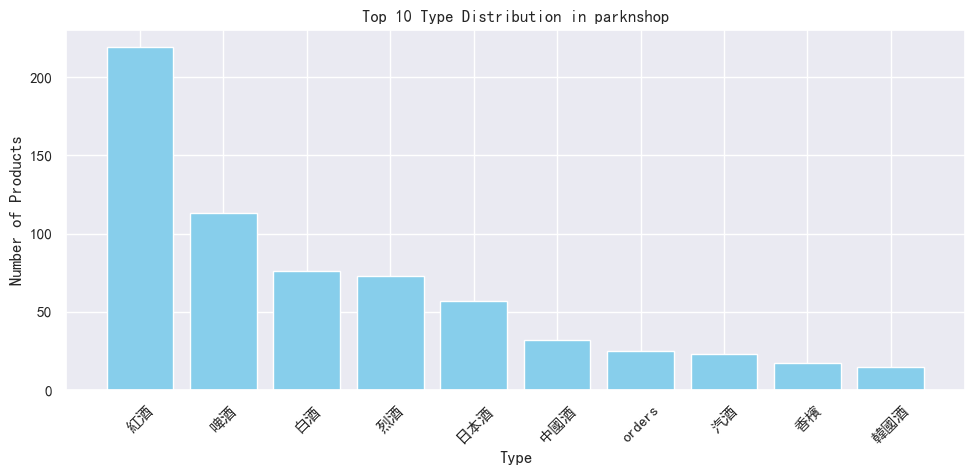

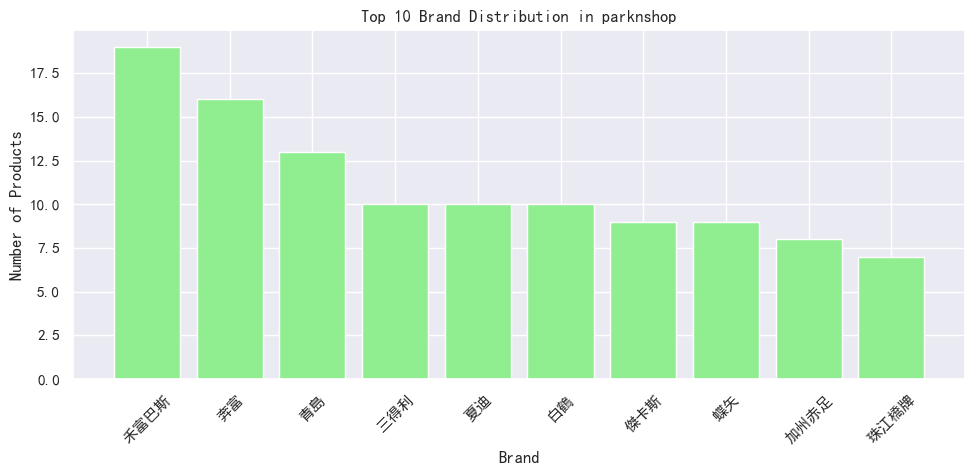

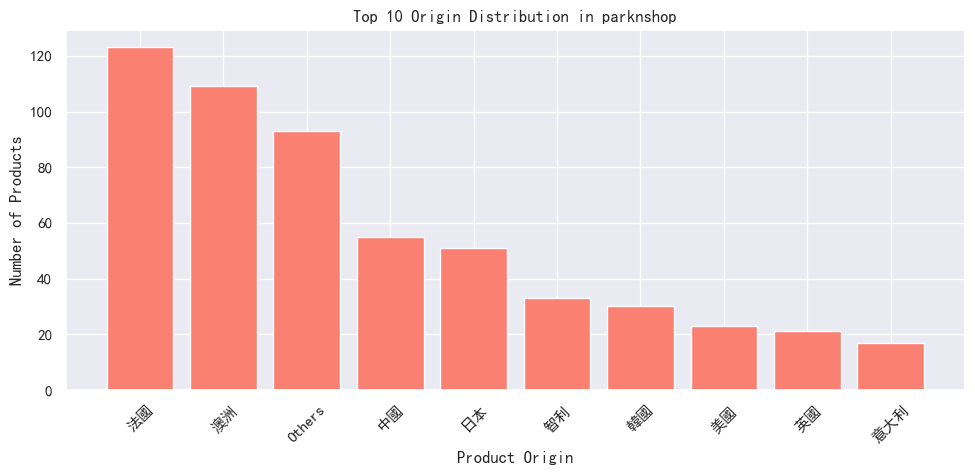

Product Distribution for wellcome


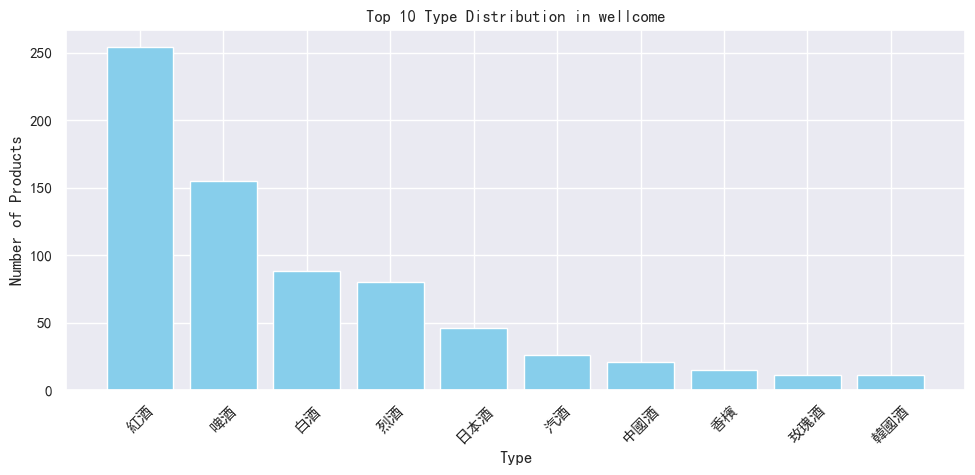

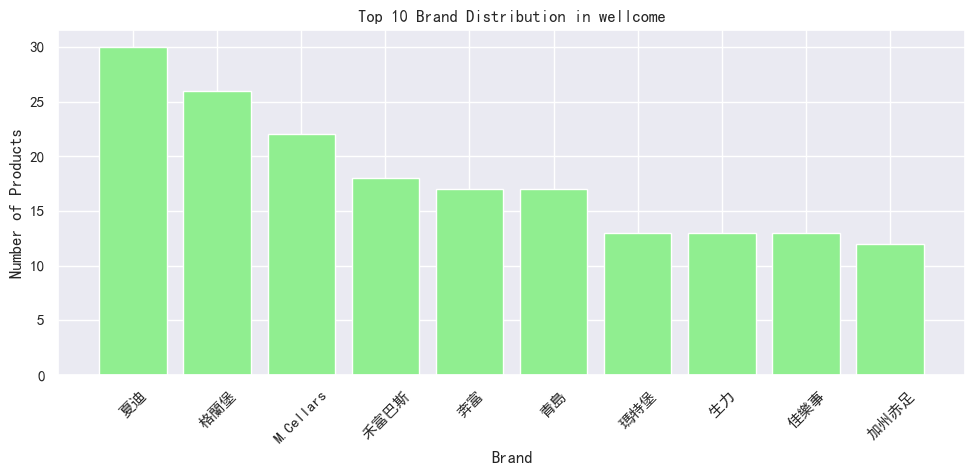

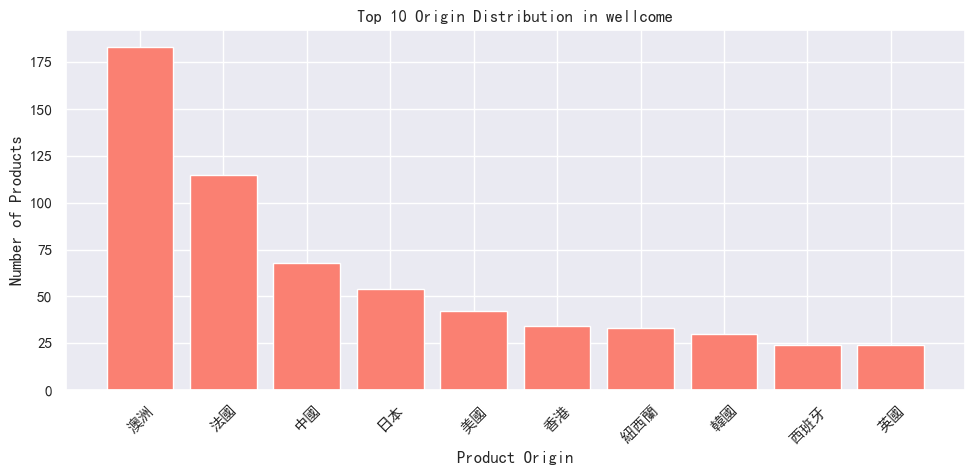

In [242]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# set up db
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

# SQL搵要既東西,轉DF
sql_query = "SELECT market_id, type, brand, product_origin FROM product_table;"  
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")
finally:
    engine.dispose()  # close sql

# matplotlib setting 轉中文,第二防格仔字,第3字大小
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 15})  

# 用market_id分组,PNC,WC各三個圖
if 'data' in locals():  # check data
    for market_id, group in data.groupby('market_id'):
        print(f"Product Distribution for {market_id}")
        
        # Product Type Distribution by Market
        type_distribution = group.groupby('type').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)
        plt.figure(figsize=(10, 5))
        plt.bar(type_distribution['type'], type_distribution['count'], color='skyblue')
        plt.xlabel('Type')
        plt.ylabel('Number of Products')
        plt.title(f"Top 10 Type Distribution in {market_id}")
        plt.xticks(rotation=45) 
        plt.tight_layout()  
        plt.show()

        # Brand Distribution by Market
        brand_distribution = group.groupby('brand').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)
        plt.figure(figsize=(10, 5))
        plt.bar(brand_distribution['brand'], brand_distribution['count'], color='lightgreen')
        plt.xlabel('Brand')
        plt.ylabel('Number of Products')
        plt.title(f"Top 10 Brand Distribution in {market_id}")
        plt.xticks(rotation=45)  
        plt.tight_layout()  
        plt.show()

        # Origin Distribution by Market
        origin_distribution = group.groupby('product_origin').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)
        plt.figure(figsize=(10, 5))
        plt.bar(origin_distribution['product_origin'], origin_distribution['count'], color='salmon')
        plt.xlabel('Product Origin')
        plt.ylabel('Number of Products')
        plt.title(f"Top 10 Origin Distribution in {market_id}")
        plt.xticks(rotation=45) 
        plt.tight_layout()  
        plt.show()

Data loaded successfully


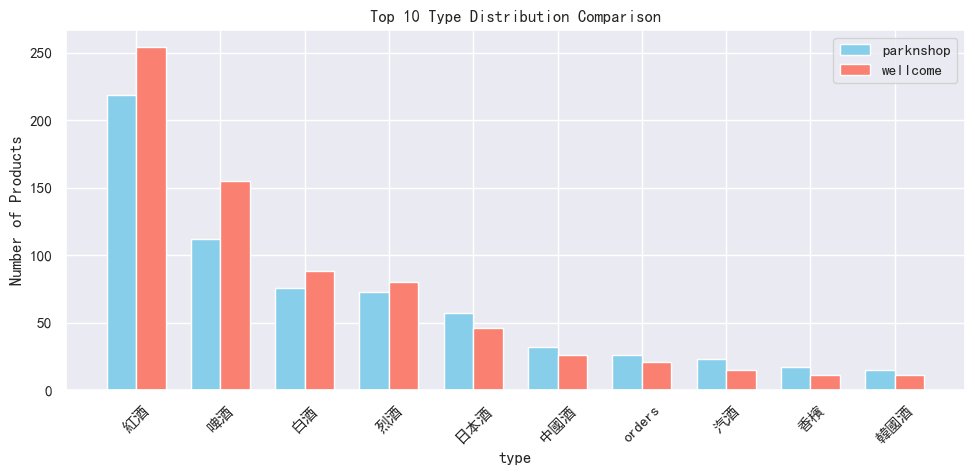

In [168]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt


database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)


sql_query = "SELECT market_id, type, brand, product_origin FROM product_table;"
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")
finally:
    engine.dispose()  


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 15})

#set up 空白dataframe
summary_data = pd.DataFrame()

for market_id, group in data.groupby('market_id'):
    top_types = group.groupby('type').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)
    top_types['market_id'] = market_id
    summary_data = pd.concat([summary_data, top_types])

# 用market_id分類
summary_data['market_id'] = summary_data['market_id'].astype('category')

#SET UP 圖
def plot_comparison(summary_data, category, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    
    unique_market_ids = summary_data['market_id'].unique()
    
    # !=2 要保證有2個ID
    if len(unique_market_ids) != 2:
        print(f"Error: There should be exactly 2 unique market IDs, but found {len(unique_market_ids)}.")
        return
    
    # ID[0] ID[1]去分開DATA
    market1_data = summary_data[summary_data['market_id'] == unique_market_ids[0]]
    market2_data = summary_data[summary_data['market_id'] == unique_market_ids[1]]
    
    # set 粗度
    bar_width = 0.35
    r1 = range(len(market1_data))
    r2 = [x + bar_width for x in r1]
    
    # SET UP bar bar pnc用藍,wc用紅
    ax.bar(r1, market1_data['count'], width=bar_width, label=str(unique_market_ids[0]), color='skyblue')
    ax.bar(r2, market2_data['count'], width=bar_width, label=str(unique_market_ids[1]), color='salmon')
    
    # set title
    ax.set_xlabel(category)
    ax.set_ylabel('Number of Products')
    ax.set_title(title)
    ax.set_xticks([r + bar_width/2 for r in range(len(market1_data))])
    ax.set_xticklabels(market1_data[category], rotation=45)
    ax.legend()
    
    
    plt.tight_layout()
    plt.show()


plot_comparison(summary_data, 'type', 'Top 10 Type Distribution Comparison')

Data loaded successfully


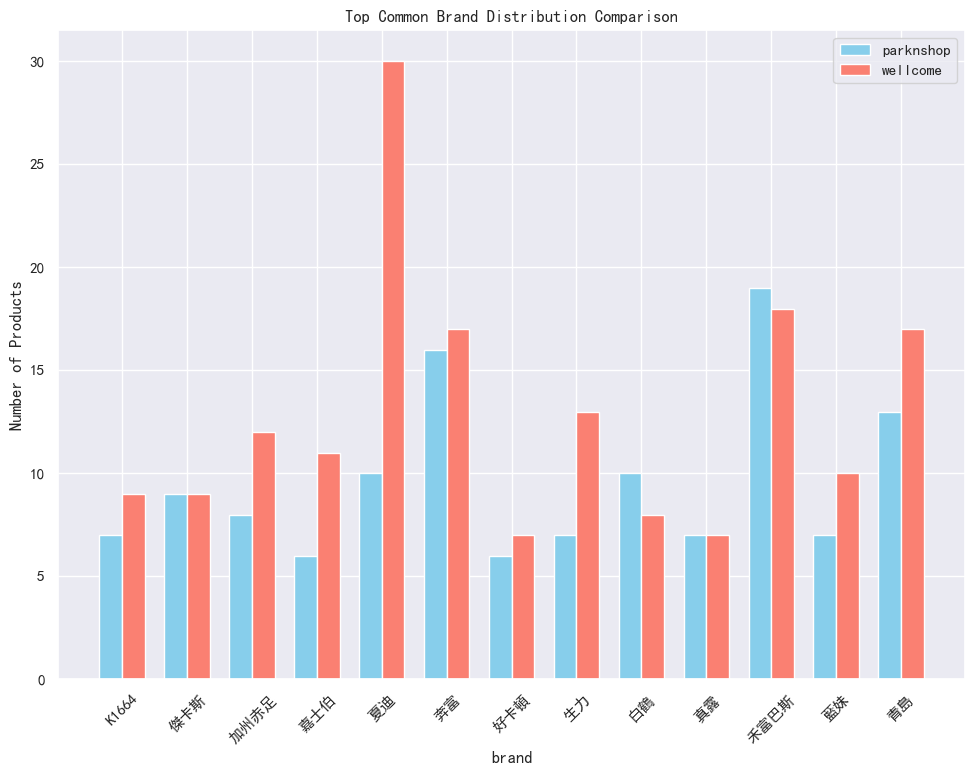

In [167]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt


database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)


sql_query = "SELECT market_id, type, brand, product_origin FROM product_table;"
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")
finally:
    engine.dispose()  


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 15})


summary_data = pd.DataFrame()


for market_id, group in data.groupby('market_id'):
    top_brands = (
        group.groupby('brand')
        .size()
        .reset_index(name='count')
        .sort_values(by='count', ascending=False)
        .head(20)
    )
    top_brands['market_id'] = market_id
    summary_data = pd.concat([summary_data, top_brands])


top_brands_in_markets = summary_data['brand'].value_counts()
top_common_brands = top_brands_in_markets[top_brands_in_markets == 2].index.tolist()


summary_data_common = summary_data[summary_data['brand'].isin(top_common_brands)]


def plot_comparison(summary_data, category, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    unique_market_ids = summary_data['market_id'].unique()
    
  
    if len(unique_market_ids) != 2:
        print(f"Error: There should be exactly 2 unique market IDs, but found {len(unique_market_ids)}.")
        return
    
    
    market1_data = summary_data[summary_data['market_id'] == unique_market_ids[0]]
    market2_data = summary_data[summary_data['market_id'] == unique_market_ids[1]]
    
    
    market1_data = market1_data.sort_values(by=category)
    market2_data = market2_data.sort_values(by=category)
    
    
    bar_width = 0.35
    r1 = range(len(market1_data))
    r2 = [x + bar_width for x in r1]
    
    
    ax.bar(r1, market1_data['count'], width=bar_width, label=str(unique_market_ids[0]), color='skyblue')
    ax.bar(r2, market2_data['count'], width=bar_width, label=str(unique_market_ids[1]), color='salmon')
    
    
    ax.set_xlabel(category)
    ax.set_ylabel('Number of Products')
    ax.set_title(title)
    ax.set_xticks([r + bar_width/2 for r in range(len(market1_data))])
    ax.set_xticklabels(market1_data[category], rotation=45)
    ax.legend()
    
    
    plt.tight_layout()
    plt.show()


plot_comparison(summary_data_common, 'brand', 'Top Common Brand Distribution Comparison')

Data loaded successfully


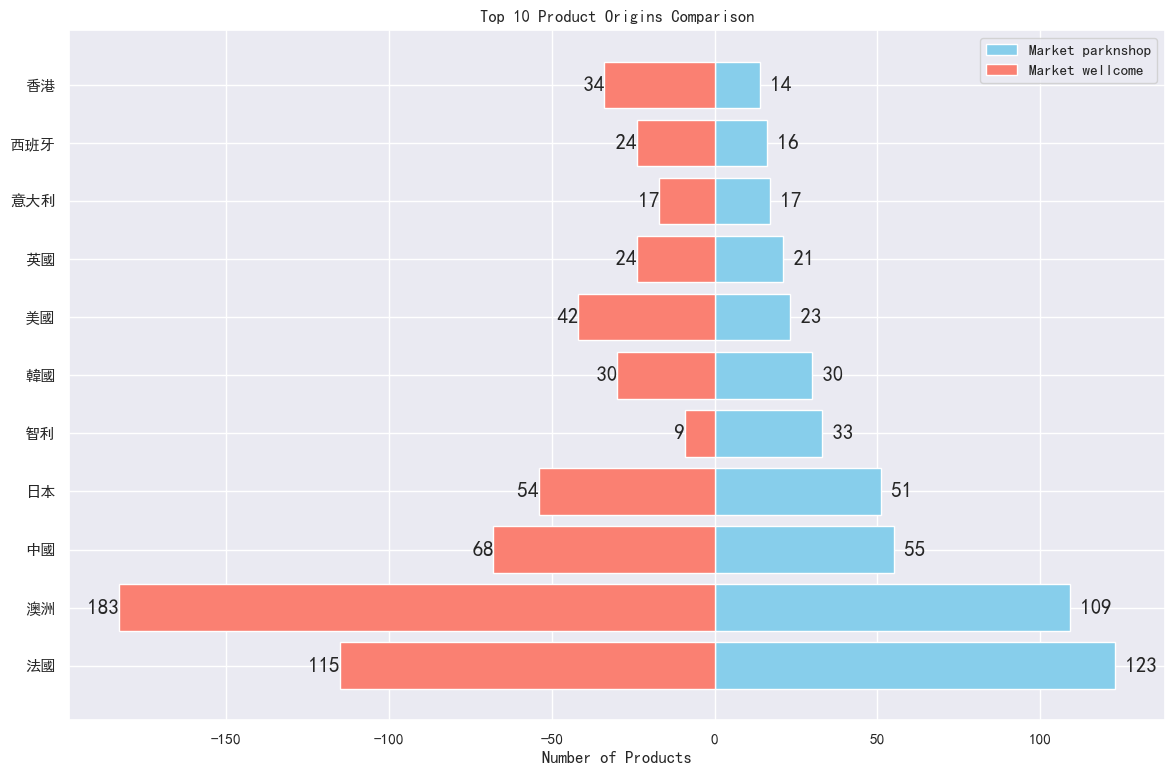

In [166]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
#BACK TO BACK 圖

database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)


sql_query = "SELECT market_id, type, brand, product_origin FROM product_table;"
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")
finally:
    engine.dispose()  


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 15})


top_origins_per_market = data.groupby(['market_id', 'product_origin']) \
                             .size() \
                             .reset_index(name='count') \
                             .sort_values(['market_id', 'count'], ascending=[True, False]) \
                             .groupby('market_id') \
                             .head(15)


market_ids = top_origins_per_market['market_id'].unique()
if len(market_ids) != 2:
    raise ValueError('There must be exactly two unique market_ids for comparison.')

market1_origins = top_origins_per_market[top_origins_per_market['market_id'] == market_ids[0]]
market2_origins = top_origins_per_market[top_origins_per_market['market_id'] == market_ids[1]]


common_origins = market1_origins.merge(market2_origins, on='product_origin', suffixes=('_market1', '_market2'))


fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(common_origins['product_origin'], common_origins['count_market1'], color='skyblue', label=f'Market {market_ids[0]}')
ax.barh(common_origins['product_origin'], -common_origins['count_market2'], color='salmon', label=f'Market {market_ids[1]}')

ax.set_xlabel('Number of Products')
ax.set_title('Top 10 Product Origins Comparison')


for index, value in enumerate(common_origins['count_market1']):
    ax.text(value, index, f' {value}', va='center', ha='left')
for index, value in enumerate(common_origins['count_market2']):
    ax.text(-value, index, f' {value}', va='center', ha='right')


ax.legend()


plt.tight_layout()
plt.show()

Data loaded successfully


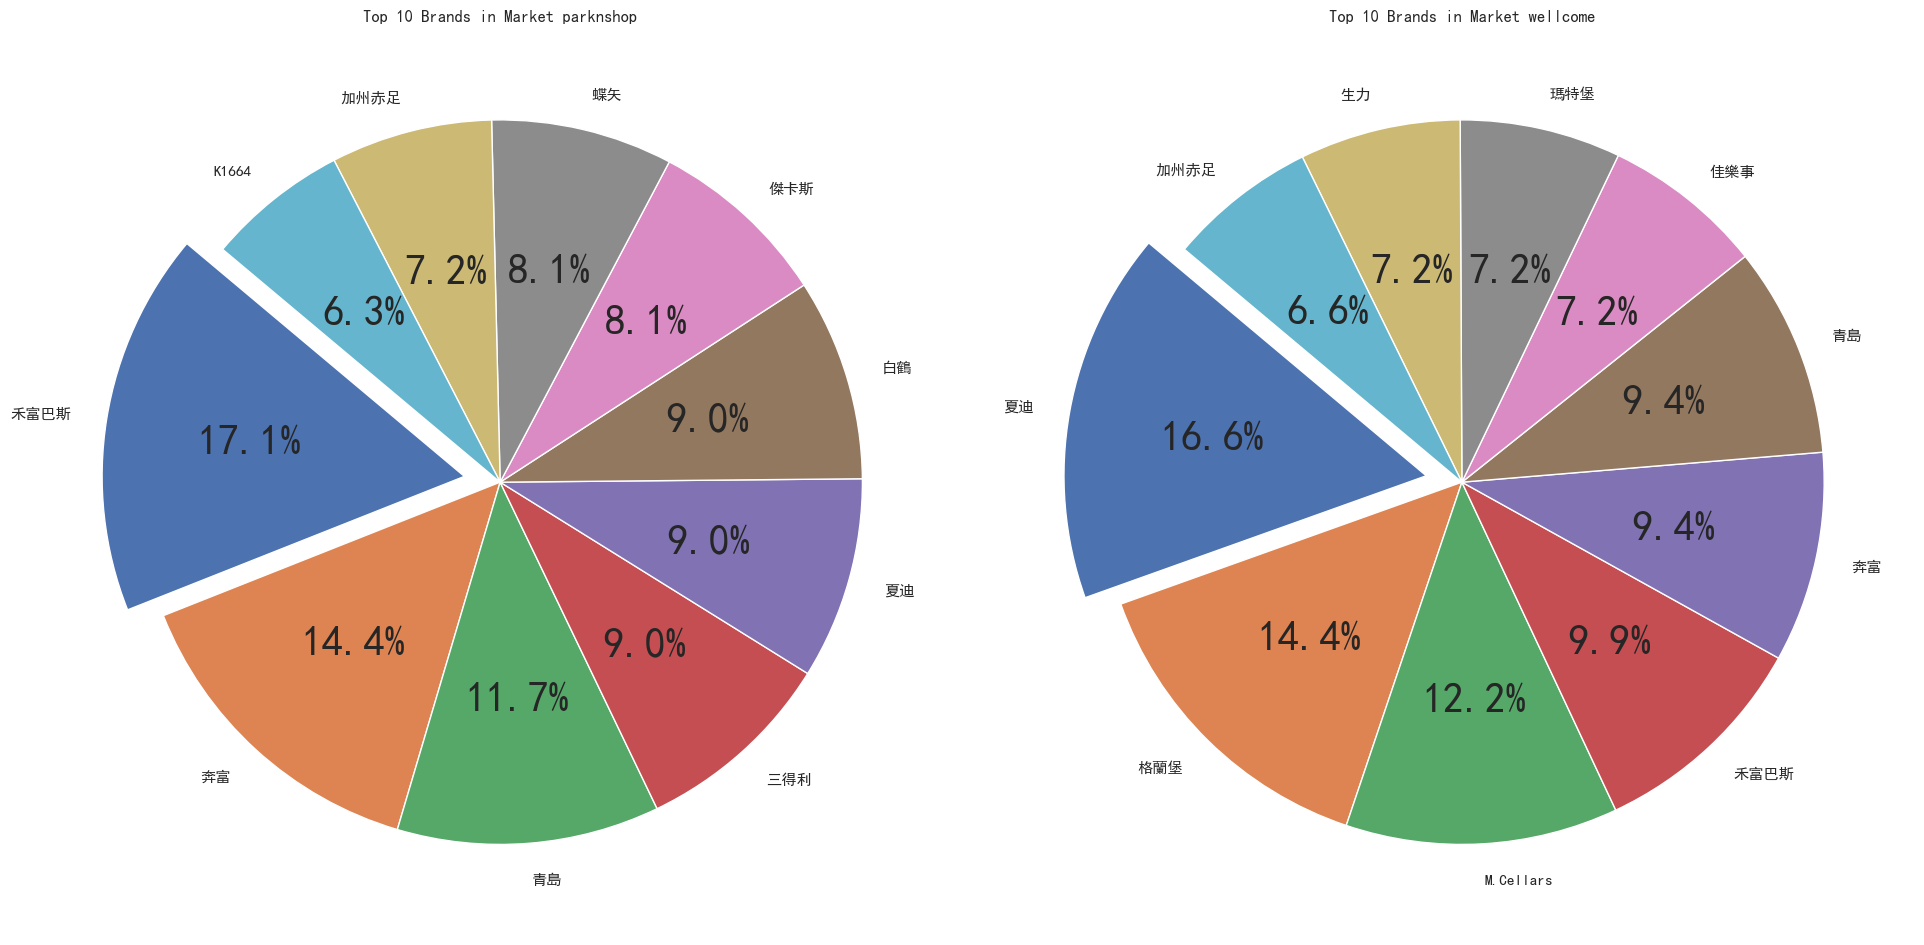

In [252]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# Database connection details
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

# SQL query to retrieve data from the product_table
sql_query = "SELECT market_id, type, brand, product_origin FROM product_table;"
try:
    # Read data from the database into a Pandas DataFrame
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")
finally:
    # Release the database connection resources
    engine.dispose()

# Configure font settings for plotting
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 30})

# Group the data by market_id and brand, and compute the counts
brand_counts = data.groupby(['market_id', 'brand']).size().reset_index(name='counts')
market_ids = brand_counts['market_id'].unique()

# Create subplots for each market_id
fig, axes = plt.subplots(nrows=1, ncols=len(market_ids), figsize=(20, 10))

# Generate pie charts for each market_id
for i, market_id in enumerate(market_ids):
    # Select the top 10 brands by counts for the current market_id
    top_brands = brand_counts[brand_counts['market_id'] == market_id].nlargest(10, 'counts')

    # Reset the index and compute the percentage of each brand's count
    top_brands.reset_index(drop=True, inplace=True)
    total = top_brands['counts'].sum()
    top_brands['percentage'] = 100 * top_brands['counts'] / total

    # Determine the index of the brand with the highest percentage and set an explode value for highlighting
    max_index = top_brands['percentage'].idxmax()
    explode = [0] * len(top_brands)
    explode[max_index] = 0.1

    # Generate the pie chart for the current market_id
    axes[i].pie(top_brands['percentage'], labels=top_brands['brand'], autopct='%1.1f%%', startangle=140, explode=explode)
    axes[i].set_title(f'Top 10 Brands in Market {market_id}')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Data loaded successfully


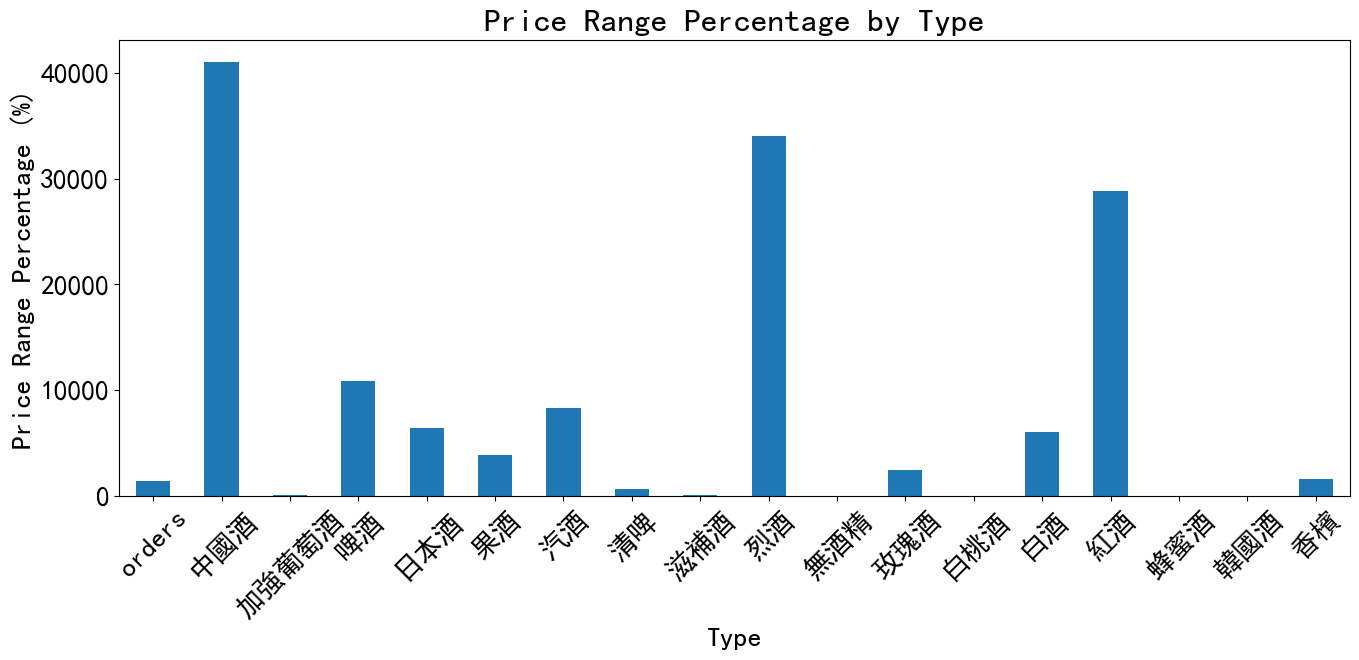

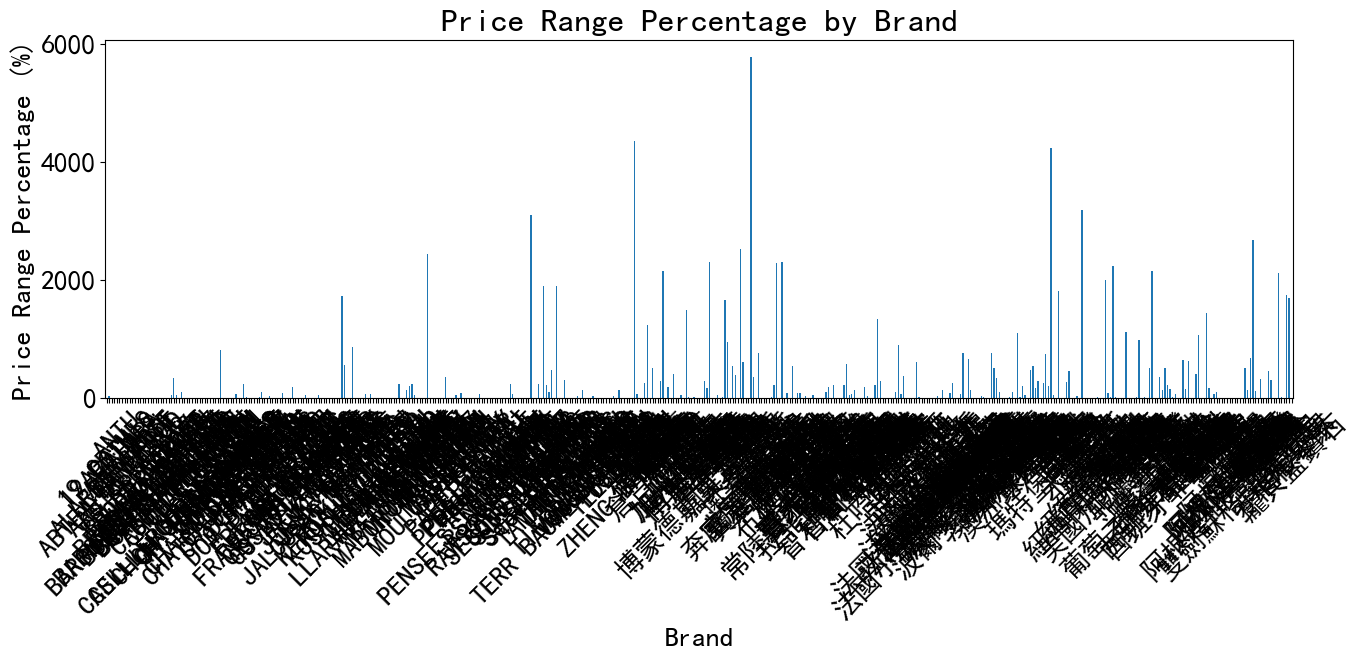

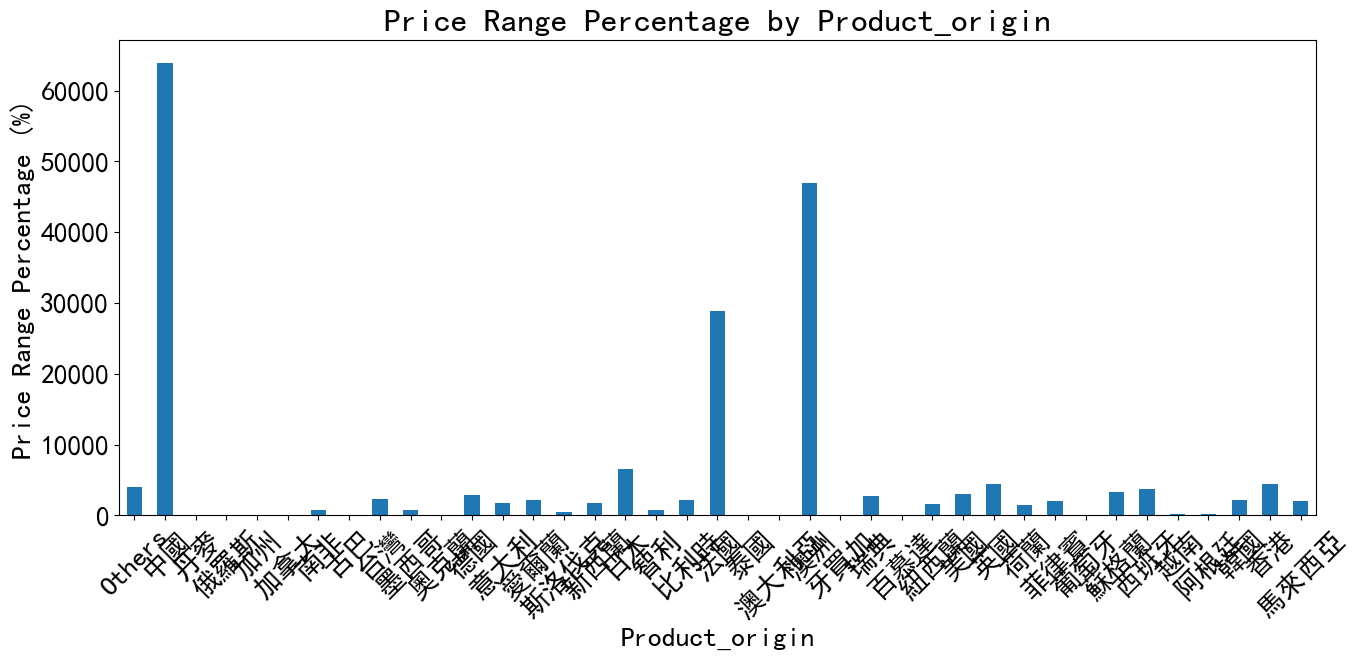

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)


sql_query = """
SELECT p.type, p.brand, p.product_origin, d.current_price
FROM product_table p
JOIN daily_table d ON p.product_id = d.product_id;
"""


plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
plt.rcParams.update({'font.size': 20})  


try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")
finally:
    engine.dispose() 


for attribute in ['type', 'brand', 'product_origin']:
    
    price_stats = data.groupby([attribute]).current_price.agg(['max', 'min'])
    price_stats['price_range'] = price_stats['max'] - price_stats['min']
    price_stats['price_range_pct'] = (price_stats['price_range'] / price_stats['min']) * 100
    
    
    plt.figure(figsize=(14, 7))
    price_stats['price_range_pct'].plot(kind='bar')
    
    
    plt.title(f'Price Range Percentage by {attribute.capitalize()}')
    plt.xlabel(attribute.capitalize())
    plt.ylabel('Price Range Percentage (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

Data loaded successfully


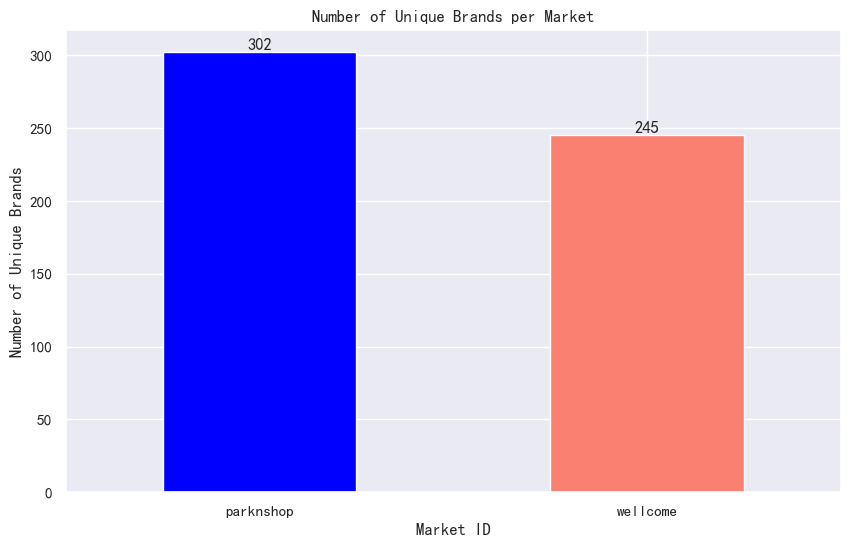

In [162]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Database configuration
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

# SQL query to load data
sql_query = "SELECT market_id, brand FROM product_table;"
try:
    # Load the data into a DataFrame
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
    
    # Assuming 'market_id' is a store identifier and we want to compare the number of unique brands in each market
    brand_counts = data.groupby('market_id')['brand'].nunique()
    
    # Define colors for each bar
    colors = ['blue', 'salmon'] if len(brand_counts) == 2 else plt.cm.jet(np.linspace(0, 1, len(brand_counts)))
    
    # Plotting the bar chart
    ax = brand_counts.plot(kind='bar', figsize=(10, 6), color=colors)
    plt.title("Number of Unique Brands per Market")
    plt.xlabel("Market ID")
    plt.ylabel("Number of Unique Brands")
    plt.xticks(rotation=0)
    
    # Adding the text labels on the bars
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, 
                str(i.get_height()), ha='center', va='bottom')
    
    plt.show()
except Exception as e:
    print(f"Error loading data: {e}")
finally:
    # Dispose the engine
    engine.dispose()

Data loaded successfully


C:\Users\genhk\AppData\Local\Temp\ipykernel_32828\1040046757.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_origins = top_origins.groupby('market_id', group_keys=False).apply(lambda x: x.nlargest(10, 'count'))


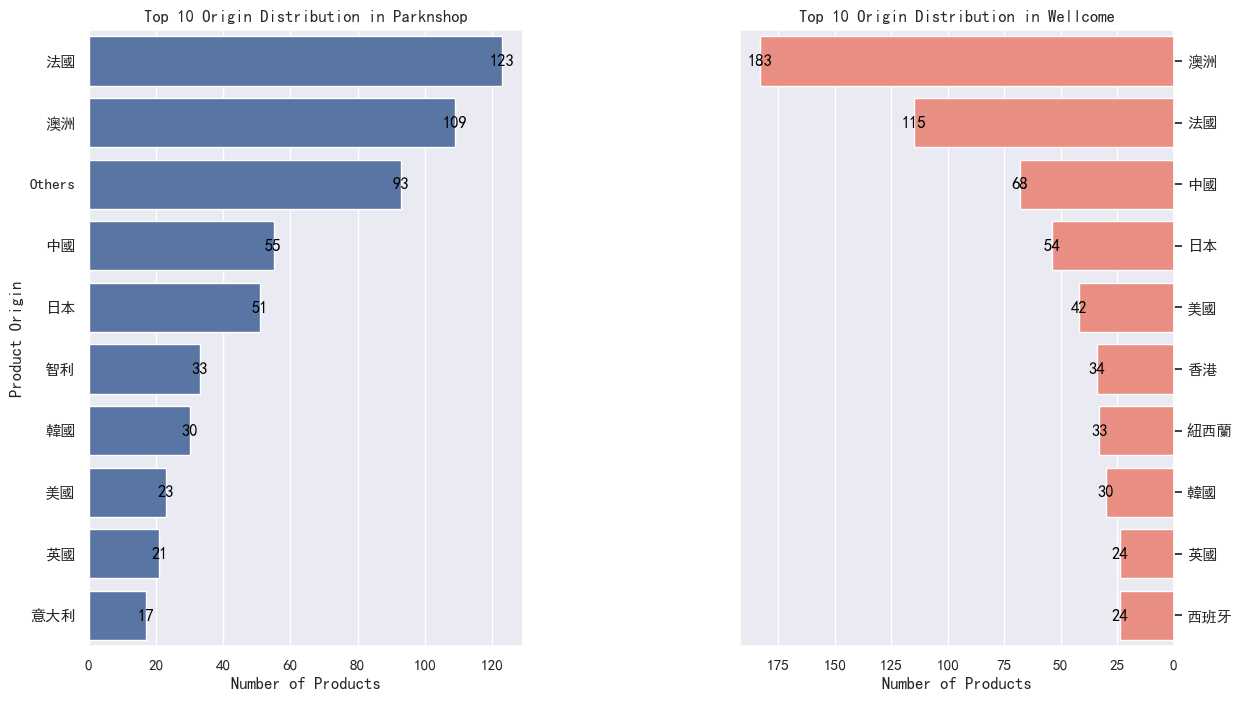

In [226]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set up the database connection
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

# SQL query to DataFrame
sql_query = "SELECT market_id, type, brand, product_origin FROM product_table;"  
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")
finally:
    engine.dispose()  # Close the database connection

def add_labels(ax, spacing=5):
    rect_labels = []
    for rect in ax.patches:
        # Get the position and width of each rectangle
        y_value = rect.get_y() + rect.get_height() / 2
        x_value = rect.get_width()
        
        # Use the ax's text method to add labels on the bars
        label = ax.text(x_value, y_value,  # Set the position of the label
                        f'{x_value:.0f}',  # Format the label content
                        ha='center',       # Horizontal alignment: center
                        va='center',       # Vertical alignment: center
                        color='black')     # Label color
        rect_labels.append(label)

top_origins = data.groupby(['market_id', 'product_origin']).size().reset_index(name='count')

# To avoid DeprecationWarning, we need to reselect the 'market_id' column
top_origins = top_origins.groupby('market_id', group_keys=False).apply(lambda x: x.nlargest(10, 'count'))

# Get the data for each market separately
data_parknshop = top_origins[top_origins['market_id'] == 'parknshop']
data_wellcome = top_origins[top_origins['market_id'] == 'wellcome']

# Set seaborn style
rc = {'font.sans-serif': 'SimHei', 'axes.unicode_minus': False}
sns.set(context='notebook', style="darkgrid", rc=rc)

# Create a figure and set up two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={'wspace': 0.5})

# Plot the count distribution for the first market and add labels
sns.barplot(x='count', y='product_origin', data=data_parknshop, ax=ax1)
add_labels(ax1)  # Call the function to add labels for the first plot
ax1.set_ylabel('Product Origin')
ax1.set_xlabel('Number of Products')
ax1.set_title('Top 10 Origin Distribution in Parknshop')

# Plot the count distribution for the second market and add labels
# Use color='salmon' to set the color for the barplot
sns.barplot(x='count', y='product_origin', data=data_wellcome, color='salmon', ax=ax2)
add_labels(ax2)  # Call the function to add labels for the second plot
ax2.set_ylabel('')  # Remove the y-axis label for the second plot
ax2.set_xlabel('Number of Products')
ax2.set_title('Top 10 Origin Distribution in Wellcome')

# To match the first plot, reverse the y-axis tick labels and move them to the right side for the second plot
ax2.invert_xaxis()
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

# Show the plots
plt.show()

Data loaded successfully


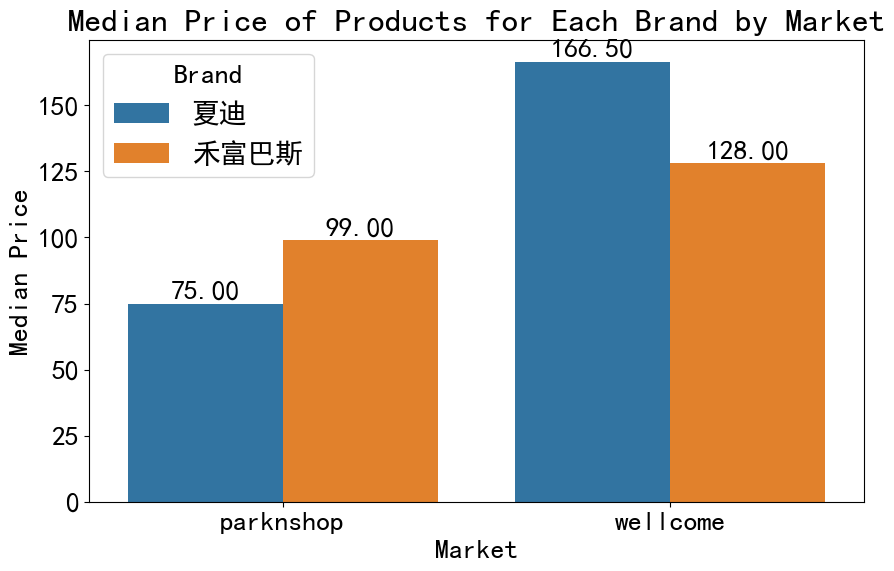

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Set up the database connection
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
plt.rcParams.update({'font.size': 20})  
# Prompt the user to enter brand keywords
keywords = input("Enter brand keywords separated by a space: ").split()

# Construct the brand filter condition
brand_condition = " OR ".join([f"p.brand LIKE '%%{keyword}%%'" for keyword in keywords])

# Query data from the database and convert it to a DataFrame
sql_query = f"""
SELECT p.type, p.brand, p.product_origin, d.current_price, p.product_id, d.market_id
FROM product_table p
JOIN daily_table d ON p.product_id = d.product_id
WHERE {brand_condition};
"""

# Try to load data from the database
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")
finally:
    engine.dispose()  # Close the database connection

# Filter data based on brand keywords
filtered_data = data[data['brand'].str.contains('|'.join(keywords))]

# Group the data by brand and market, and calculate the median price for each brand in each market
brand_market_summary = filtered_data.groupby(['brand', 'market_id']).agg(
    median_price=pd.NamedAgg(column='current_price', aggfunc='median')
).reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='market_id', y='median_price', hue='brand', data=brand_market_summary)
plt.title('Median Price of Products for Each Brand by Market')
plt.xlabel('Market')
plt.ylabel('Median Price')
plt.legend(title='Brand')

# Add value labels on top of each bar
for p in barplot.patches:
    height = p.get_height()
    # Only add labels when the height of the bar is greater than the threshold
    if height > 1e-6:
        barplot.annotate(format(height, '.2f'),  # Format the label to two decimal places
                         (p.get_x() + p.get_width() / 2., height),  # Set the label position
                         ha='center', va='center',  # Horizontal and vertical alignment: center
                         xytext=(0, 9),  # Set the text offset
                         textcoords='offset points')

plt.show()

Data loaded successfully


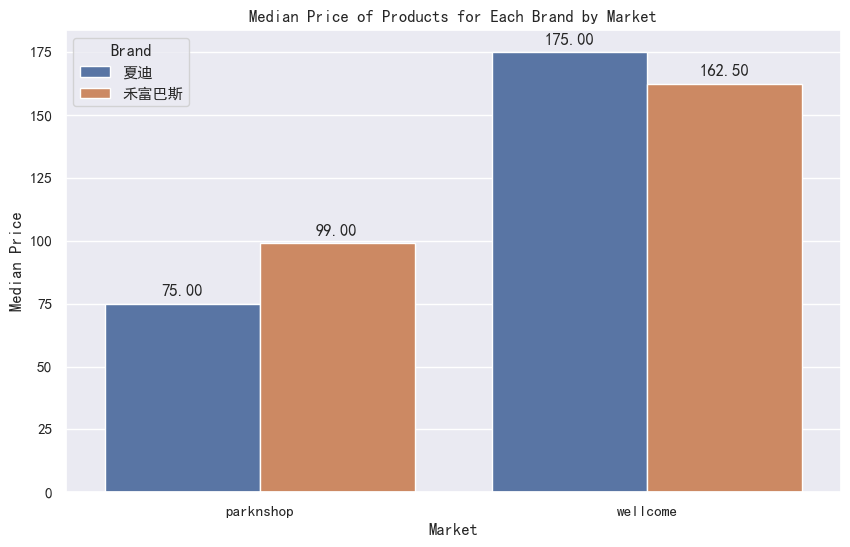

In [227]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Set up the database connection
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

# Query data from the database and convert it to a DataFrame
sql_query = """
SELECT p.type, p.brand, p.product_origin, d.current_price, p.product_id, d.market_id
FROM product_table p
JOIN daily_table d ON p.product_id = d.product_id
WHERE (p.brand LIKE '%%禾富巴斯%%' OR p.brand LIKE '%%夏迪%%');
"""

# Try to load data from the database
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")
finally:
    engine.dispose()  # Close the database connection

# Filter data based on brand keywords
keywords = ['禾富巴斯', '夏迪']
filtered_data = data[data['brand'].str.contains('|'.join(keywords))]

# Group the data by brand and market, and calculate the median price for each brand in each market
brand_market_summary = filtered_data.groupby(['brand', 'market_id']).agg(
    median_price=pd.NamedAgg(column='current_price', aggfunc='median')
).reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='market_id', y='median_price', hue='brand', data=brand_market_summary)
plt.title('Median Price of Products for Each Brand by Market')
plt.xlabel('Market')
plt.ylabel('Median Price')
plt.legend(title='Brand')

# Add value labels on top of each bar
for p in barplot.patches:
    height = p.get_height()
    # Only add labels when the height of the bar is greater than the threshold
    if height > 1e-6:
        barplot.annotate(format(height, '.2f'),  # Format the label to two decimal places
                         (p.get_x() + p.get_width() / 2., height),  # Set the label position
                         ha='center', va='center',  # Horizontal and vertical alignment: center
                         xytext=(0, 9),  # Set the text offset
                         textcoords='offset points')

plt.show()

Data loaded successfully
   market_id brand  contains_box  box_proportion_percentage
0  parknshop    夏迪      0.000000                   0.000000
1  parknshop  禾富巴斯      0.000000                   0.000000
2   wellcome    夏迪      0.455621                  45.562130
3   wellcome  禾富巴斯      0.216981                  21.698113


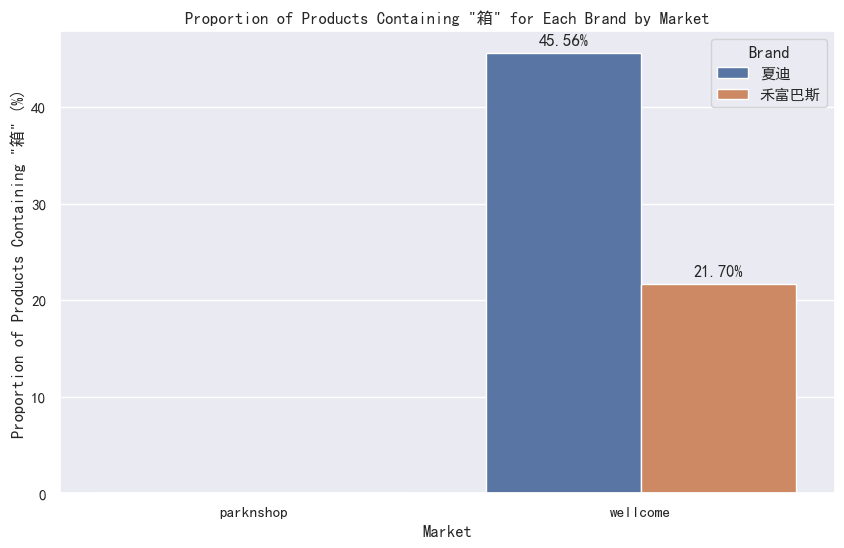

In [228]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Set up the database connection
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

# Query data from the database and convert it to a DataFrame
sql_query = """
SELECT p.type, p.brand, p.product_origin, d.current_price, p.product, p.product_id, d.market_id
FROM product_table p
JOIN daily_table d ON p.product_id = d.product_id
WHERE (p.brand LIKE '%%禾富巴斯%%' OR p.brand LIKE '%%夏迪%%');
"""

# Try to load data from the database
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")
finally:
    engine.dispose()  # Close the database connection

# Add a new column to indicate whether the product name contains '箱'
data['contains_box'] = data['product'].str.contains('箱')

# Calculate the proportion of products containing '箱' for each brand in each market
market_brand_box_proportion = data.groupby(['market_id', 'brand'])['contains_box'].mean().reset_index()

# Convert the proportion to percentage
market_brand_box_proportion['box_proportion_percentage'] = market_brand_box_proportion['contains_box'] * 100

# Output the proportion results
print(market_brand_box_proportion)

# Visualize the results
plt.figure(figsize=(10, 6))
box_barplot = sns.barplot(x='market_id', y='box_proportion_percentage', hue='brand', data=market_brand_box_proportion)
plt.title('Proportion of Products Containing "箱" for Each Brand by Market')
plt.xlabel('Market')
plt.ylabel('Proportion of Products Containing "箱" (%)')
plt.legend(title='Brand')

# Add value labels on top of each bar
for p in box_barplot.patches:
    height = p.get_height()
    # Only add labels when the height of the bar is greater than the threshold
    if height > 1e-6:
        box_barplot.annotate('{:0.2f}%'.format(height),  # Format the label as a percentage
                             (p.get_x() + p.get_width() / 2., height),  # Set the label position
                             ha='center', va='center',  # Horizontal and vertical alignment: center
                             xytext=(0, 9),  # Set the text offset
                             textcoords='offset points')

plt.show()

In [38]:
from sqlalchemy import create_engine
import pandas as pd

# Set up the database connection
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

# SQL query
sql_query = """
WITH RankedPrices AS (
    SELECT p.product, p.brand, p.product_origin, d.current_price, p.product_id, d.market_id, p.type,
           ROW_NUMBER() OVER(PARTITION BY p.product_id ORDER BY d.date DESC) as rn
    FROM product_table p
    JOIN daily_table d ON p.product_id = d.product_id
)
SELECT product, brand, product_origin, current_price, product_id, market_id, type
FROM RankedPrices
WHERE rn = 1;
"""

# Load data from the database into a DataFrame
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")
finally:
    engine.dispose()  # Close the database connection

# Filter data for each supermarket
data_parknshop = data[data['market_id'] == 'parknshop']
data_wellcome = data[data['market_id'] == 'wellcome']

# Find the top 20 highest-priced products for each supermarket
top_20_parknshop = data_parknshop.nlargest(20, 'current_price')
top_20_wellcome = data_wellcome.nlargest(20, 'current_price')

# Print the results
print("Top 20 highest price products in Parknshop:")
print(top_20_parknshop[['brand', 'product_origin', 'current_price', 'product_id', 'market_id', 'type']])
print("\nTop 20 highest price products in Wellcome:")
print(top_20_wellcome[['brand', 'product_origin', 'current_price', 'product_id', 'market_id', 'type']])

Data loaded successfully
Top 20 highest price products in Parknshop:
                  brand product_origin  current_price product_id  market_id  \
1240               澳洲奔富             澳洲         5280.0  BP_397422  parknshop   
1025                 貴州             中國         4480.0  BP_167144  parknshop   
824                 軒尼詩             法國         2998.0  BP_112595  parknshop   
945                 軒尼詩             法國         2705.0  BP_129411  parknshop   
1060                馬爹利             法國         2290.0  BP_188558  parknshop   
980   BARONS ROTHSCHILD             法國         2208.0  BP_137854  parknshop   
829                 五糧液             中國         2080.0  BP_115458  parknshop   
884                 馬爹利             法國         2068.0  BP_122245  parknshop   
914                 人頭馬             法國         2030.0  BP_124047  parknshop   
811       PERRIER JOUET             法國         1888.0  BP_110313  parknshop   
1418               雲霧之灣            新西蘭         1780.0  BP_4778

In [39]:
top_20_parknshop

,product,brand,product_origin,current_price,product_id,market_id,type
1240,澳洲奔富 Penfolds Bin 407 Cabernet Sauvignon 2020 ...,澳洲奔富,澳洲,5280.0,BP_397422,parknshop,紅酒
1025,貴州 茅台酒,貴州,中國,4480.0,BP_167144,parknshop,中國酒
824,軒尼詩 X.O 干邑龍年賀歲限量版,軒尼詩,法國,2998.0,BP_112595,parknshop,烈酒
945,軒尼詩 軒尼詩X.O.干邑,軒尼詩,法國,2705.0,BP_129411,parknshop,烈酒
1060,馬爹利 馬爹利XO,馬爹利,法國,2290.0,BP_188558,parknshop,
980,BARONS ROTHSCHILD BARONS ROTHSCHILD 原箱香檳( 6 x ...,BARONS ROTHSCHILD,法國,2208.0,BP_137854,parknshop,香檳
829,五糧液 酒５２度,五糧液,中國,2080.0,BP_115458,parknshop,中國酒
884,馬爹利 藍帶干邑 (大號),馬爹利,法國,2068.0,BP_122245,parknshop,烈酒
914,人頭馬 人頭馬XO特優香檳干邑70cl,人頭馬,法國,2030.0,BP_124047,parknshop,烈酒
811,PERRIER JOUET 巴黎之花 美麗時光香檳2014禮盒套裝,PERRIER JOUET,法國,1888.0,BP_110313,parknshop,香檳


In [159]:
top_20_wellcome

,product,brand,product_origin,current_price,product_id,market_id,type
491,拉菲酒莊 2011 750ml,拉菲酒莊,中國,8382.0,520387,wellcome,紅酒
155,原箱芝華士 12年威士忌12 X 70 CL,芝華士,中國,4776.0,222075,wellcome,烈酒
205,奔富 Grange 750ML,奔富,美國,4698.0,239434,wellcome,紅酒
685,奔富 Grange 750ML,奔富,法國,4698.0,759423,wellcome,紅酒
101,原箱尊尼獲加黑牌十二年威士忌12 x 700ML,尊尼獲加,紐西蘭,4260.0,201962,wellcome,烈酒
34,奔富 Bin 707 Cabernet Sauvignon 750ML,奔富,台灣,2998.0,169599,wellcome,紅酒
620,原箱聖哈利百年珍藏切粒子6 x 750ML,聖哈利,法國,2330.0,665828,wellcome,紅酒
24,馬爹利 XO 干邑 700ML,馬爹利,法國,2290.0,167544,wellcome,烈酒
373,軒尼詩XO 干邑 700ML,軒尼詩,中國,2258.0,419788,wellcome,烈酒
586,人頭馬 XO 優質香檳區干邑 700ML,人頭馬,美國,2090.0,629568,wellcome,烈酒


Data loaded successfully


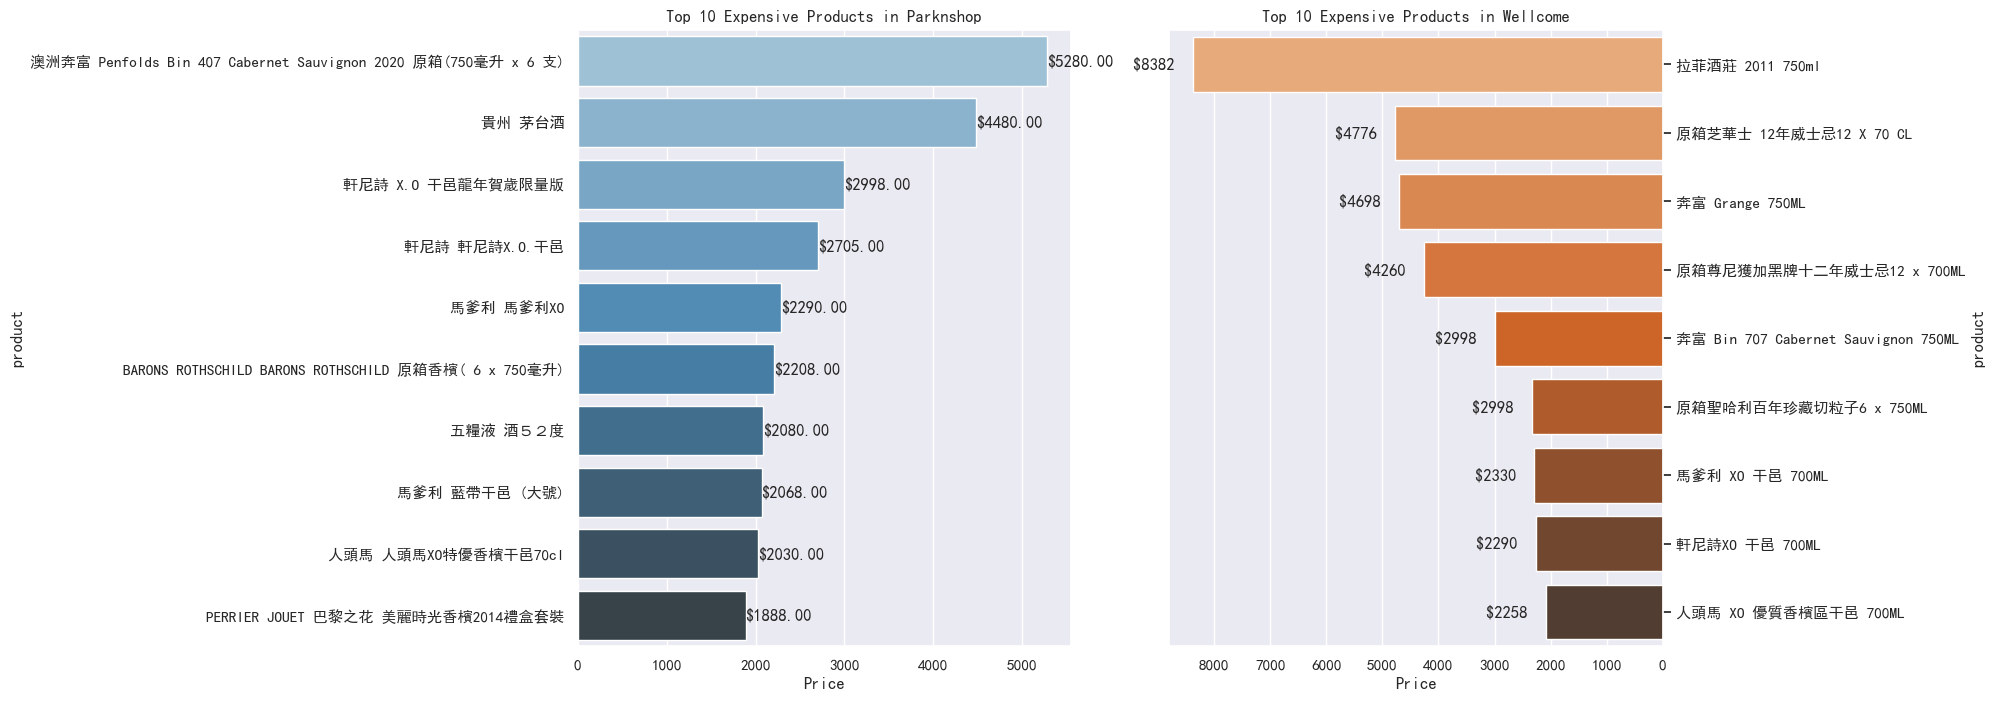

In [36]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Set up the database connection
database = "blue"
user = "postgres"
password = "1234"
host = "0.tcp.ap.ngrok.io"
port = "17617"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)
# SQL query using window function to get the latest price record for each product_id and include the product name
sql_query = """
WITH RankedPrices AS (
    SELECT p.product, p.brand, p.product_origin, d.current_price, p.product_id, d.market_id,
           ROW_NUMBER() OVER(PARTITION BY p.product_id ORDER BY d.date DESC) as rn
    FROM product_table p
    JOIN daily_table d ON p.product_id = d.product_id
)
SELECT product, brand, product_origin, current_price, product_id, market_id
FROM RankedPrices
WHERE rn = 1;
"""
# Load data from the database into a DataFrame
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")
finally:
    engine.dispose()  # Close the database connection
# Filter data for each supermarket
data_parknshop = data[data['market_id'] == 'parknshop']
data_wellcome = data[data['market_id'] == 'wellcome']
# Find the top 10 highest-priced products for each supermarket
top_10_parknshop = data_parknshop.nlargest(10, 'current_price')
top_10_wellcome = data_wellcome.nlargest(10, 'current_price')

# print(top_10_parknshop)
# print('-----')
# print(top_10_wellcome)
# # Create the price chart
rc = {'font.sans-serif': 'SimHei', 'axes.unicode_minus': False}
sns.set(context='notebook', style="darkgrid", rc=rc)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
# Parknshop price chart
sns.barplot(y='product', x='current_price', hue='product', data=top_10_parknshop, palette="Blues_d", ax=ax1, dodge=False)
# ax1.set_ylabel('Product Name')
ax1.set_xlabel('Price')
ax1.set_title('Top 10 Expensive Products in Parknshop')
# # Remove the legend
# legend = ax1.legend_
# if legend is not None:
#     legend.remove()

# Add price labels outside the bar chart
for i, (price, product) in enumerate(zip(top_10_parknshop['current_price'], top_10_parknshop['product'])):
    ax1.text(price + 0.05, i, f'${price:.2f}', va='center')

# # Wellcome price chart
sns.barplot(y='product', x='current_price', hue='product', data=top_10_wellcome, palette="Oranges_d", ax=ax2, dodge=False)
# ax2.set_ylabel('')  # Remove the y-axis label
ax2.set_xlabel('Price')
ax2.set_title('Top 10 Expensive Products in Wellcome')
# # Remove the legend
# legend = ax2.legend_
# if legend is not None:
#     legend.remove()
# # Assume the lowest price among the top five as the threshold price
# threshold_price = sorted(top_10_wellcome['current_price'], reverse=True)[4]
# # Add price labels outside the bar chart
# for i, (price, product) in enumerate(zip(top_10_wellcome['current_price'], top_10_wellcome['product'])):
#     # If the price is below the threshold, use a larger offset
#     if price < threshold_price:
#         offset = price * 1.25  # For lower prices, use a larger offset
#     else:
#         offset = price * 0.02  # For higher prices, use the standard offset
#     # Adjust the y-position to avoid overlapping
#     y_position = i
#     if i > 0 and price == top_10_wellcome['current_price'].iloc[i-1]:
#         y_position += 0.2
#     ax2.text(price + offset, y_position, f'#{i} - ${price:.2f}', va='center', ha='left')
# ax2.text(price + offset, y_position, f'#{i} - ${price:.2f}', va='center', ha='left')

# for i, (price, product) in enumerate(zip(top_10_wellcome['current_price'], top_10_wellcome['product'])):
#     ax2.text(price + 0.05, i, f'#{i} - ${price:.2f}', ha="right", va='center')

for idx, p in enumerate(ax2.patches):
    ax2.annotate("$%.0f   " % top_10_wellcome['current_price'].values[idx], xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="right", va="center")

# # Adjust the chart layout
# plt.tight_layout()
# # Reverse the y-axis for the Wellcome chart and adjust the tick labels
ax2.invert_xaxis()
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
# Display the chart
plt.show()

Data loaded successfully


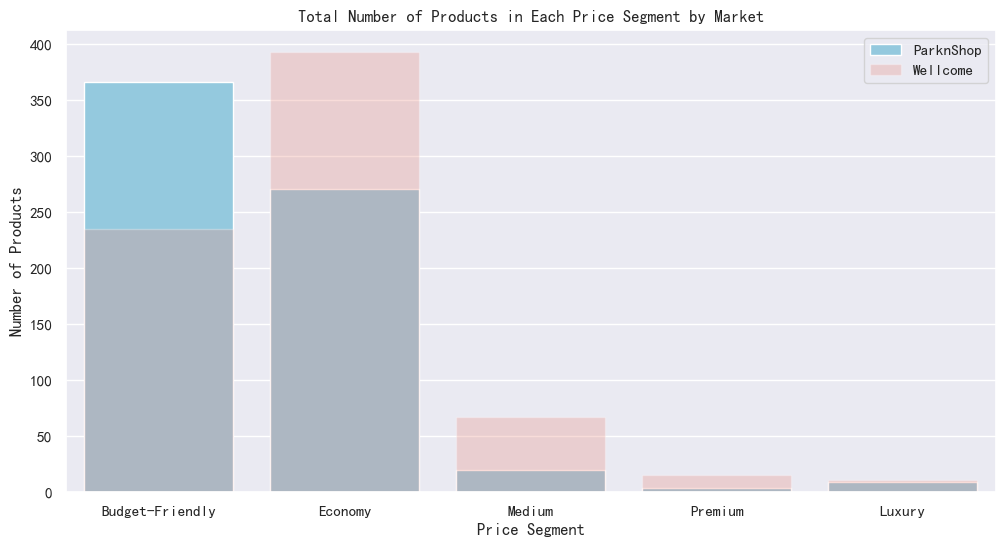

In [239]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the database connection
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

# SQL query
sql_query = """
WITH RankedPrices AS (
    SELECT p.product, p.brand, p.product_origin, d.current_price, p.product_id, d.market_id,
           ROW_NUMBER() OVER(PARTITION BY p.product_id ORDER BY d.date DESC) as rn
    FROM product_table p
    JOIN daily_table d ON p.product_id = d.product_id
)
SELECT product, brand, product_origin, current_price, product_id, market_id
FROM RankedPrices
WHERE rn = 1;
"""

# Load data from the database into a DataFrame
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")

# Close the database connection
engine.dispose()

# Define price segments
price_segments = {
    'Budget-Friendly': (0, 100),
    'Economy': (101, 500),
    'Medium': (501, 1000),
    'Premium': (1001, 1500),
    'Luxury': (1501, float('inf'))
}

# Categorize each product into a price segment
def get_price_segment(price):
    for segment, (low, high) in price_segments.items():
        if low < price <= high:
            return segment
    return 'Other'

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False  

# Filter and apply price segment categorization for each supermarket
data_parknshop = data[data['market_id'] == 'parknshop'].copy()
data_wellcome = data[data['market_id'] == 'wellcome'].copy()

data_parknshop['price_segment'] = data_parknshop['current_price'].apply(get_price_segment)
data_wellcome['price_segment'] = data_wellcome['current_price'].apply(get_price_segment)

# Calculate the number of products in each price segment
segments_count_parknshop = data_parknshop['price_segment'].value_counts().reindex(price_segments.keys()).fillna(0)
segments_count_wellcome = data_wellcome['price_segment'].value_counts().reindex(price_segments.keys()).fillna(0)

# Create a bar plot
plt.figure(figsize=(12, 6))

# Bar plot for ParknShop supermarket
sns.barplot(x=segments_count_parknshop.index, y=segments_count_parknshop.values, color='skyblue', label='ParknShop')

# Bar plot for Wellcome supermarket
sns.barplot(x=segments_count_wellcome.index, y=segments_count_wellcome.values, color='salmon', label='Wellcome', alpha=0.3)

plt.xlabel('Price Segment')
plt.ylabel('Number of Products')
plt.title('Total Number of Products in Each Price Segment by Market')
plt.legend()
plt.show()

Data loaded successfully
Average sale price by shop:
market_id
parknshop    181.463690
wellcome     302.210165
Name: current_price, dtype: float64


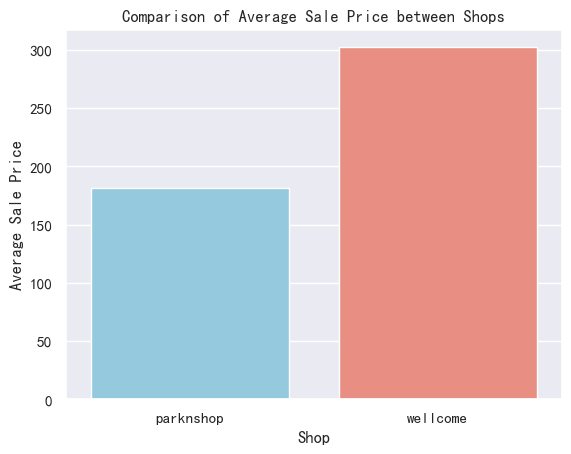

In [240]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the database connection
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

# SQL query
sql_query = """
WITH RankedPrices AS (
    SELECT p.product, p.brand, p.product_origin, d.current_price, p.product_id, d.market_id,
           ROW_NUMBER() OVER(PARTITION BY p.product_id ORDER BY d.date DESC) as rn
    FROM product_table p
    JOIN daily_table d ON p.product_id = d.product_id
)
SELECT product, brand, product_origin, current_price, product_id, market_id
FROM RankedPrices
WHERE rn = 1;
"""

# Load data from the database into a DataFrame
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")

# Close the database connection
engine.dispose()

# Calculate the average sale price by shop
average_price_by_shop = data.groupby('market_id')['current_price'].mean()

# Print the results
print("Average sale price by shop:")
print(average_price_by_shop)

# Visualization for comparison
sns.barplot(x=average_price_by_shop.index, y=average_price_by_shop.values, hue=average_price_by_shop.index, palette=['skyblue', 'salmon'], legend=False)
plt.xlabel('Shop')
plt.ylabel('Average Sale Price')
plt.title('Comparison of Average Sale Price between Shops')
plt.show()

Data loaded successfully


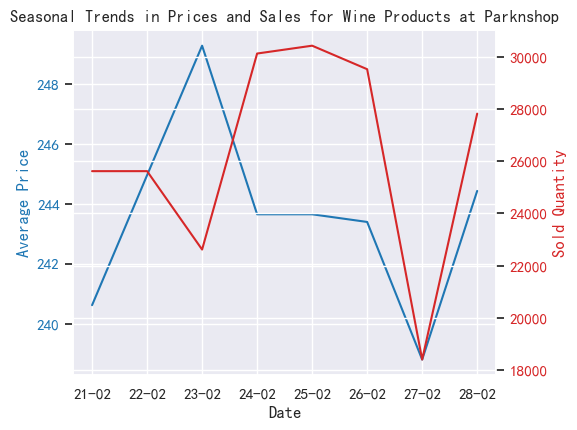

In [291]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# Set up the database connection
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

# SQL query
sql_query = """
SELECT * FROM daily_table
"""

# Load data from the database into a DataFrame
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")

# Close the database connection
engine.dispose()

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

# Check if the 'current_price' and 'sold_quantity' columns are numeric, if not convert them
data['current_price'] = pd.to_numeric(data['current_price'], errors='coerce')
data['sold_quantity'] = pd.to_numeric(data['sold_quantity'], errors='coerce')

# Group by date to find the average price and total sold quantity for each day
price_trends = data.groupby('date')['current_price'].mean()
sales_trends = data.groupby('date')['sold_quantity'].sum()

# Create subplots
fig, ax1 = plt.subplots()

# Plot the price trend (blue line)
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Price', color=color)
ax1.plot(price_trends.index, price_trends.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_major_formatter(DateFormatter('%d-%m'))

# Create a twin Axes sharing the same x-axis for the sold quantity
ax2 = ax1.twinx()

# Plot the sales trend (red line)
color = 'tab:red'
ax2.set_ylabel('Sold Quantity', color=color)
ax2.plot(sales_trends.index, sales_trends.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Configure the plot
fig.tight_layout()
plt.title('Seasonal Trends in Prices and Sales for Wine Products at Parknshop')
plt.show()

Data loaded successfully


C:\Users\genhk\AppData\Local\Temp\ipykernel_32828\3123188410.py:30: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'])


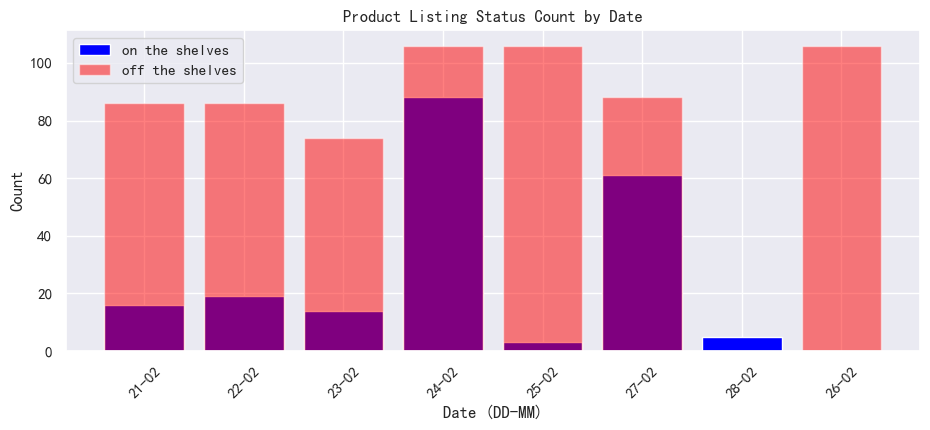

In [293]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# Set up the database connection
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

# SQL query
sql_query = """
SELECT * FROM daily_table
"""

# Load data from the database into a DataFrame
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")

# Close the database connection
engine.dispose()

# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Aggregate the count of products on and off the shelves for each date
count_on_shelves = data[data['listing_status'] == 'on the shelves'].groupby(data['date'].dt.strftime('%d-%m')).size()
count_off_shelves = data[data['listing_status'] == 'off the shelves'].groupby(data['date'].dt.strftime('%d-%m')).size()

# Plot a bar chart
plt.figure(figsize=(10, 5))  # You can adjust the size of the figure as per your needs
plt.bar(count_on_shelves.index, count_on_shelves, color='blue', label='on the shelves')
plt.bar(count_off_shelves.index, count_off_shelves, color='red', label='off the shelves', alpha=0.5)
plt.xlabel('Date (DD-MM)')
plt.ylabel('Count')
plt.legend()
plt.title('Product Listing Status Count by Date')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

Data loaded successfully


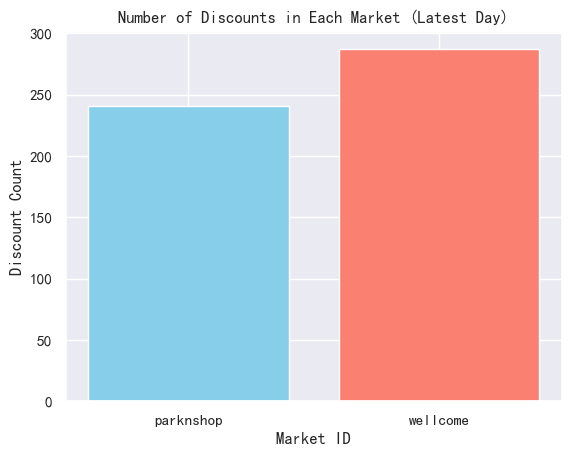

In [215]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# Set up the database connection
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

# SQL query
sql_query = """
SELECT * FROM daily_table
"""

# Load data from the database into a DataFrame
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")

# Close the database connection
engine.dispose()

# Filter out rows with discount = 0 or empty value
filtered_data = data[(data['discount'] != '') & (data['discount'] != 0)]

# Filter data for the latest day
latest_day_data = filtered_data[filtered_data['date'] == filtered_data['date'].max()]

# Calculate the count of discounts in each market for the latest day
discount_counts = latest_day_data.groupby('market_id')['discount'].count()

# Plot a bar chart and set colors
plt.bar(discount_counts.index, discount_counts.values, color=['skyblue', 'salmon'])

plt.xlabel('Market ID')
plt.ylabel('Discount Count')
plt.title('Number of Discounts in Each Market (Latest Day)')
plt.xticks(rotation=0)
plt.show()

Data loaded successfully


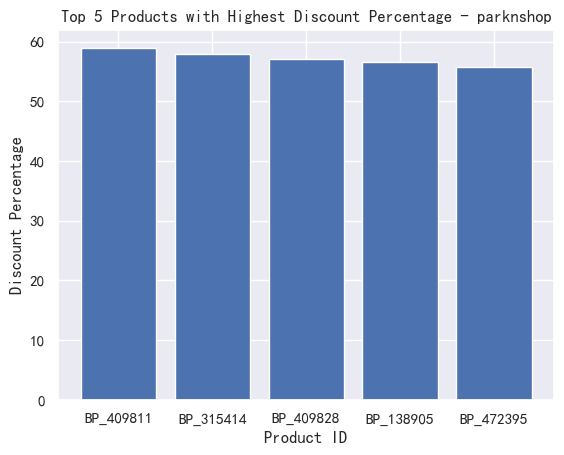

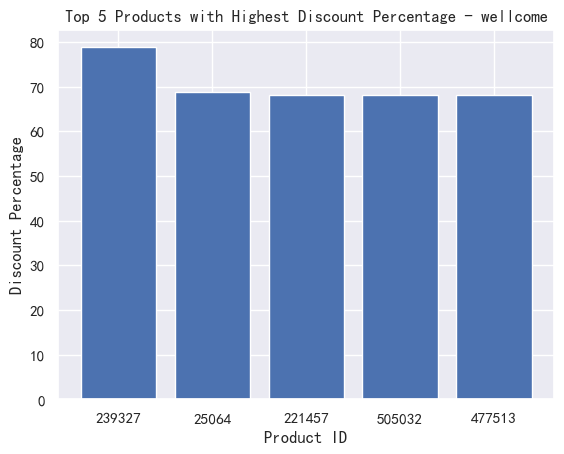

In [219]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# Set up the database connection
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

# SQL query
sql_query = """
SELECT * FROM daily_table
"""

# Load data from the database into a DataFrame
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")

# Close the database connection
engine.dispose()

# Convert the date column to datetime format and sort by date in descending order
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')
data = data.sort_values(by='date', ascending=False)

# Select the latest date's price information
latest_prices = data[data['date'] == data['date'].max()][['product_id', 'current_price', 'original_price', 'market_id']]

# Calculate the discount percentage
latest_prices['discount_percentage'] = (1 - (latest_prices['current_price'] / latest_prices['original_price'])) * 100

# Group by market_id
grouped_prices = latest_prices.groupby('market_id')

# Generate separate plots for each market
for market, data in grouped_prices:
    top_5 = data.nlargest(5, 'discount_percentage')
    
    plt.bar(top_5['product_id'], top_5['discount_percentage'])
    plt.xlabel('Product ID')
    plt.ylabel('Discount Percentage')
    plt.title(f'Top 5 Products with Highest Discount Percentage - {market}')
    plt.xticks(rotation=0)
    plt.show()

Data loaded successfully


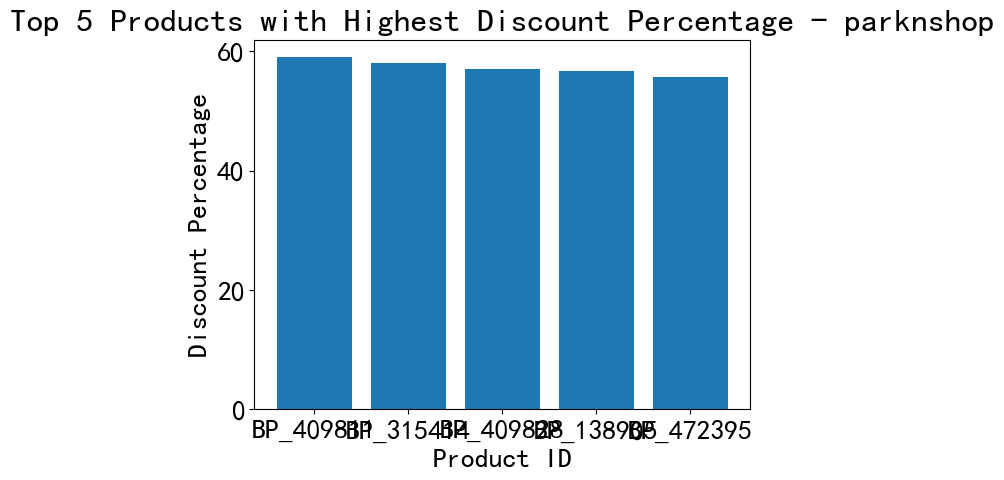

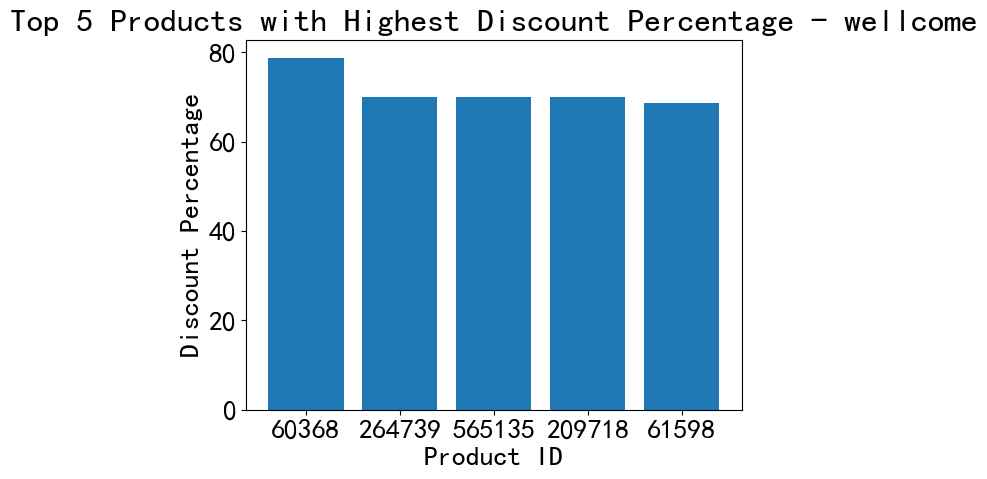

Highest Discount


In [35]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

def generate_results():
    # Set up the database connection
    database = "blue"
    user = "postgres"
    password = "1234"
    host = "localhost"
    port = "5432"
    db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
    engine = create_engine(db_string)

    # SQL query
    sql_query = """
    SELECT * FROM daily_table
    """

    # Load data from the database into a DataFrame
    try:
        data = pd.read_sql_query(sql_query, engine)
        print("Data loaded successfully")
    except Exception as e:
        print(f"Error loading data: {e}")

    # Close the database connection
    engine.dispose()

    # Convert the date column to datetime format and sort by date in descending order
    data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')
    data = data.sort_values(by='date', ascending=False)

    # Select the latest date's price information
    latest_prices = data[data['date'] == data['date'].max()][['product_id', 'current_price', 'original_price', 'market_id']]

    # Calculate the discount percentage
    latest_prices['discount_percentage'] = (1 - (latest_prices['current_price'] / latest_prices['original_price'])) * 100

    # Group by market_id
    grouped_prices = latest_prices.groupby('market_id')

    # Generate separate plots for each market
    for market, data in grouped_prices:
        top_5 = data.nlargest(5, 'discount_percentage')

        plt.bar(top_5['product_id'], top_5['discount_percentage'])
        plt.xlabel('Product ID')
        plt.ylabel('Discount Percentage')
        plt.title(f'Top 5 Products with Highest Discount Percentage - {market}')
        plt.xticks(rotation=0)
        plt.show()

    # Print the text "Highest Discount"
    print("Highest Discount")

# Prompt for user input
input_text = input("Enter 'Highest Discount' to generate results: ")

# Check if input matches and call the function
if input_text == "Highest Discount":
    generate_results()



Data loaded successfully


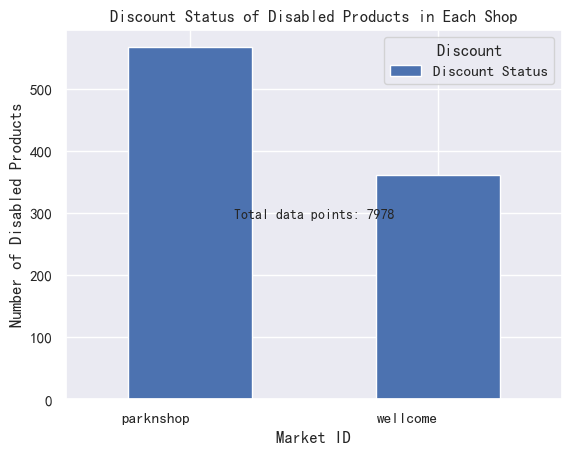

In [224]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# Set up the database connection
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

# SQL query
sql_query = """
SELECT * FROM daily_table
"""

# Load data from the database into a DataFrame
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")

# Close the database connection
engine.dispose()

# Select the desired columns
disabled_products = data[data['sold_out'] == 1][['market_id', 'discount']]

# Check if there is a discount available
disabled_products['has_discount'] = disabled_products['discount'].apply(lambda x: 1 if isinstance(x, str) else 0)

# Calculate the discount status of disabled products for each shop
shop_discounts = disabled_products.groupby('market_id')['has_discount'].value_counts().unstack().fillna(0)
shop_discounts.columns = ['Discount Status']

# Plot a stacked bar chart
ax = shop_discounts.plot(kind='bar', stacked=True)

# Adjust the position and rotation angle of the x-axis labels
ax.set_xticklabels(shop_discounts.index, rotation=0, ha='right')

plt.xlabel('Market ID')
plt.ylabel('Number of Disabled Products')
plt.title('Discount Status of Disabled Products in Each Shop')
plt.legend(title='Discount')

# Calculate the total number of data points
total_data_points = data.shape[0]

# Add total data points to the plot
plt.text(0.5, 0.5, f"Total data points: {total_data_points}", transform=ax.transAxes, fontsize=10, verticalalignment='center', horizontalalignment='center')

plt.show()

Data loaded successfully


C:\Users\genhk\AppData\Local\Temp\ipykernel_32828\3968865336.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_prices.loc[:, 'discount_percentage'] = (1 - (latest_prices['current_price'] / latest_prices['original_price'])) * 100


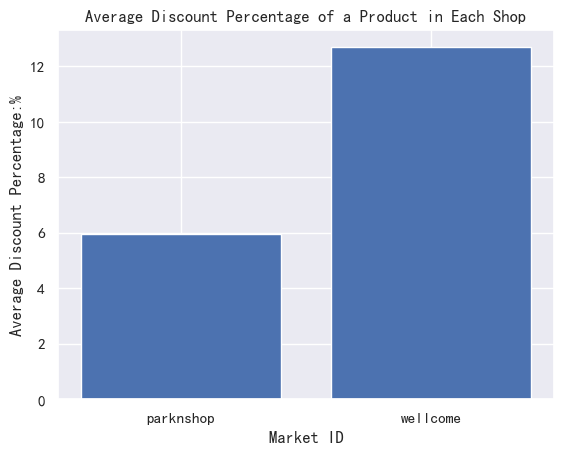

In [225]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# Set up the database connection
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

# SQL query
sql_query = """
SELECT * FROM daily_table
"""

# Load data from the database into a DataFrame
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")

# Close the database connection
engine.dispose()

# Select the desired columns
latest_prices = data[['product_id', 'current_price', 'original_price', 'market_id']]

# Convert numeric columns to float
latest_prices.loc[:, 'current_price'] = pd.to_numeric(latest_prices['current_price'], errors='coerce')
latest_prices.loc[:, 'original_price'] = pd.to_numeric(latest_prices['original_price'], errors='coerce')

# Calculate discount percentage
latest_prices.loc[:, 'discount_percentage'] = (1 - (latest_prices['current_price'] / latest_prices['original_price'])) * 100

# Calculate average discount percentage per market
average_discounts = latest_prices.groupby('market_id')['discount_percentage'].mean()

# Create a bar chart
plt.bar(average_discounts.index, average_discounts.values)
plt.xlabel('Market ID')
plt.ylabel('Average Discount Percentage:%')
plt.title('Average Discount Percentage of a Product in Each Shop')
plt.xticks(rotation=0)
plt.show()

Data loaded successfully


C:\Users\genhk\AppData\Local\Temp\ipykernel_39260\84594025.py:43: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'])


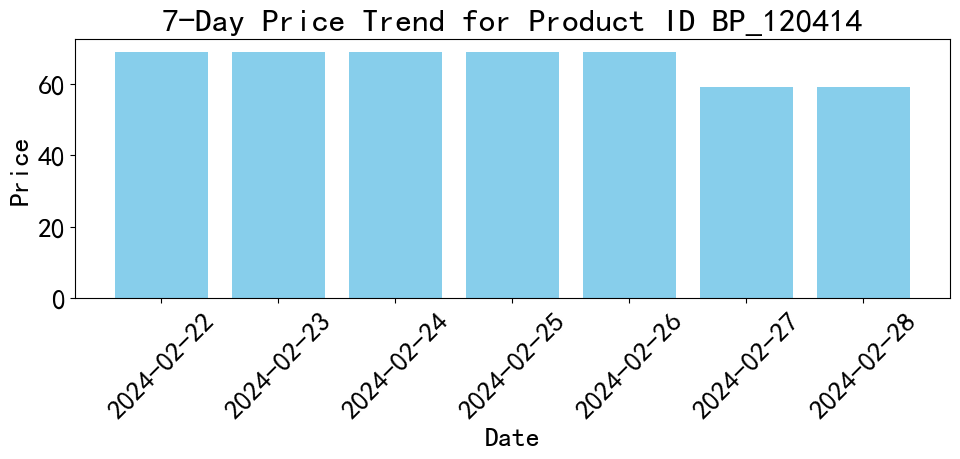

In [30]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

# Set up the database connection
database = "blue"
user = "postgres"
password = "1234"
host = "localhost"
port = "5432"
db_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(db_string)

# Get product_id from user input
input_product_id = input("Please enter the product_id: ")

# SQL query
sql_query = f"""
SELECT date, current_price FROM daily_table
WHERE product_id = '{input_product_id}'
ORDER BY date DESC
LIMIT 7
"""

# Initialize 'data' before the try block as an empty DataFrame
data = pd.DataFrame()

# Load data from the database into a DataFrame
try:
    data = pd.read_sql_query(sql_query, engine)
    print("Data loaded successfully")
except Exception as e:
    print(f"Error loading data: {e}")

# Close the database connection
engine.dispose()

# Check if data is empty
if data.empty:
    print("No data found for the given product_id.")
else:
    # Convert the 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'])

    # Sort the DataFrame by date
    data = data.sort_values(by='date')

    # Plot a bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(data['date'].dt.strftime('%Y-%m-%d'), data['current_price'], color='skyblue')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'7-Day Price Trend for Product ID {input_product_id}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [254]:
import csv
import psycopg2

# Connect to the database
def connect(host="localhost", database="blue", user="postgres", password="1234"):
    try:
        connection = psycopg2.connect(
            user=user,
            password=password,
            host=host,
            port="5432",
            database=database
        )
        print("Successfully connected to the database")
        return connection
    except psycopg2.Error as e:
        print(f"Unable to connect to the database: {e}")
        return None

# Call the connect function to establish a database connection
conn = connect()

if conn is not None:
    try:
        # Create a cursor object
        cur = conn.cursor()
        
        # Execute the query
        cur.execute("SELECT * FROM daily_table ")

        # Get the query result
        rows = cur.fetchall()

        # Get column names
        column_names = [desc[0] for desc in cur.description]

        # Specify the CSV file path, please replace the following path with the actual one
        csv_file_path = r'C:\Users\genhk\Desktop\JDE9\daily_table_list_file.csv'
       

        # Write the data to a CSV file
        with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
            csvwriter = csv.writer(csvfile)
            csvwriter.writerow(column_names)  # Write column names
            csvwriter.writerows(rows)  # Write query results

    except psycopg2.Error as e:
        print(f"Database error: {e}")
    finally:
        # Close the cursor and connection
        cur.close()
        conn.close()
else:
    print("No connection to the database.")

Successfully connected to the database
